# Анализ оттока клиентов банка "Метанпромбанк"

# Цель работы: 

1. На основании анализа данных выделить категории клиентов с наибольшим оттоком за исследуемый период

2. Выявить возможные причины оттока клиентов

3. Предоставить рекомендации для отдела маркетинга для минимизации оттока клиентов

# Ход работы:

1. Предобработка данных

1.1. Переименование столбцов

1.2. Преобразование типов столбцов

1.3. Проверка на дубликаты

1.3.1. Проверка на неявные дубликаты

1.4. Проверка на пропуски

1.5. Определение типов пропусков

1.6. Обработка пропущенных значений

1.7. Проверка на аномалии

1.8. Кодирование переменных

1.9. Вывод по разделу

2. Исследовательский анализ данных

2.1. Анализ распределения признаков в разрезе оттока

2.1.1. Распределение клиентов по городам

2.1.3. Распределение клиентов по кредитному рейтингу

2.1.4. Распределение клиентов по половому признаку

2.1.6. Распределение клиентов по возрасту

2.1.7. Распределение клиентов по баллам собственности

2.1.9. Распределение клиентов по балансу

2.1.10. Распределение клиентов по количеству продуктов

2.1.11. Распределение клиентов по наличию кредитной карты

2.1.12. Распределение клиентов по признаку активности

2.1.14. Распределение клиентов по доходу

2.2. Анализ портретов клиентов в разрезе оттока

2.3.Корреляционный анализ

2.3.1. Выявление степени корреляции между оттоком клиентов и другими признаками

2.3.2. Выявление связи между другими признаками

2.4. Вывод по разделу

3. Проверка гипотез

3.1. Между оставшимися и ушедшими клиентами есть разница в доходе

3.2. Между ушедшими и оставшимися клиентами есть разница в балансе

3.3. Средний баланс ушедших клиентов превышает 750 тыс

3.4. Средний баланс оставшихся клиентов не превышает 750 тыс

3.5. Между ушедшими и оставшимися клиентами есть разница в количестве продуктов

3.6. Есть разница в баллах собственности между ушедшими и оставшимисч клиентами

3.7. Есть разница в кредитном рейтинге между ушедшими и оставшимися клиентами

3.8. Среди ушедших клиентов больше мужчин

3.9. Вывод по разделу

4. Подведение промежуточных итогов

5. Сегментация клиентов

5.1. Сегмент 1. Люди предпенсионного возраста с высоким балансом

5.2. Сегмент 2. Молодые активные пользователи со средним кредитным рейтингом

5.3. Сегмент 3. Мужчины с высоким балансом и высоким баллом собственности

5.4. Сегмент 4. Люди с высоким балансом и большим количеством продуктов

5.5. Сегмент 5. Люди с высоким балансом, средним кредитным рейтингом и без кредитной карты

5.6. Вывод по разделу

6. Приоритезация сегментов 

7. Формирование рекомендаций для отдела маркетинга для минимизации оттока клиентов

8.  Общий вывод

# Ссылка на презентацию

https://disk.yandex.ru/i/Iey4L2KWkvm-Hw

## Предобработка данных

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import math as mth
import plotly.express as px
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import re
!pip install phik==0.11.1
import phik

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('chained_assignment', None)
pd.options.mode.chained_assignment = None

In [3]:
def load(df):
        print ('Первые 10 строк таблицы:')
        print ()
        display (df.head(10))
        print ()
        print ('Иноформация о таблице:')
        print ()
        display (df.info())
        print ()
        print ('Числовое описание таблицы:')
        print ()
        display (df.describe())
        print ()
        print ('Количество дубликатов в таблице:')
        print ()
        display (df.duplicated().sum())
        print ()
        print ('Количество пропусков в таблице:')
        print ()
        display (df.isna().sum())
        print ()
        print ('Процентное соотношение пропусков к общему числу значений для каждого столбца')
        print ()
        display (pd.DataFrame(round(df.isna().mean()*100, 2)).style.background_gradient('coolwarm'))

In [4]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [5]:
load(df)

Первые 10 строк таблицы:



USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   
5  202305  856.0    Рыбинск      М  56.0       4   863687.24         3   
6  177259  807.0  Ярославль      Ж  39.0       3   405042.44         3   
7  218868  825.0  Ярославль      Ж  38.0       4   458145.40         2   
8  211686  923.0  Ярославль      М  54.0       5  1206337.87         2   
9  133130  906.0  Ярославль      Ж  67.0       0         NaN         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1  
5            1              0   156619.80      0  
6            0              1   103838.32      0  
7            1              1    68085.48      0  
8            1              0   155371.79      0  
9            0              1   238055.53      0


Иноформация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None


Числовое описание таблицы:



USERID         score          age        equity       balance  \
count   10000.00000  10000.000000  9974.000000  10000.000000  7.705000e+03   
mean   171814.71260    848.699400    42.734409      2.627600  8.277943e+05   
std     33708.23812     65.448519    12.179971      1.980836  1.980614e+06   
min     94561.00000    642.000000    18.000000      0.000000  0.000000e+00   
25%    142810.25000    802.000000    33.000000      0.000000  2.955542e+05   
50%    172728.00000    853.000000    40.000000      3.000000  5.242722e+05   
75%    201261.75000    900.000000    51.000000      4.000000  9.807058e+05   
max    229145.00000   1000.000000    86.000000      9.000000  1.191136e+08   

           products   credit_card  last_activity    EST_SALARY         churn  
count  10000.000000  10000.000000   10000.000000  1.000000e+04  10000.000000  
mean       1.870100      0.680400       0.523500  1.478669e+05      0.182000  
std        0.792647      0.466345       0.499472  1.393885e+05      0.385864  
min        0.000000      0.000000       0.000000  2.546300e+03      0.000000  
25%        1.000000      0.000000       0.000000  7.525190e+04      0.000000  
50%        2.000000      1.000000       1.000000  1.196581e+05      0.000000  
75%        2.000000      1.000000       1.000000  1.745005e+05      0.000000  
max        5.000000      1.000000       1.000000  1.395064e+06      1.000000


Количество дубликатов в таблице:



0


Количество пропусков в таблице:



USERID              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
EST_SALARY          0
churn               0
dtype: int64


Процентное соотношение пропусков к общему числу значений для каждого столбца



В таблице 12 столбцов и 10 тысяч строк:

USERID - идентификатор пользователя,

score - баллы кредитного скоринга,

city - город, 

gender - пол,

age - возарст,

equity - количество баллов собственности,

balance - баланс на счёте,

products - количество продуктов, которыми пользуется клиент,

credit_card - есть ли кредитная карта,

last_activity - активный клиент,

EST_SALARY - оценочный доход клиента,

churn - признак оттока.

Есть пропуски в столбцах с возрастом (0,26%) и балансом (22,95%).

Явных дубликатов не обнаружено.

Из числового описания таблицы следует, что есть значительные выбросы в данных о балансе, чуть больше половины пользователей активны, седний уровень оттока по банку 18,2%.

###  Переименование столбцов

In [6]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid': 'user_id'})

Столбцы приведены к нижнему регистру.

###  Преобразование типов столбцов 

In [7]:
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('int', errors='ignore')
df['user_id'] = df['user_id'].astype('int')

Столбцы с баллами кредитного скоринга и возрастом приведены к целочмсленному типу.

### Проверка на дубликаты

In [8]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

Столбец с городами содержит 3 уникальных значения, неявных дубликатов не обнаружено.

In [9]:
df['gender'].value_counts()

М    5005
Ж    4995
Name: gender, dtype: int64

Столбец с полом содержит 2 уникальных значения, неявных дубликатов не обнаружено, количество женщин и мужчин в выборке примерно равно.

In [10]:
df['equity'].value_counts()

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

Столбец с баллами собственности принимает значения от 0 до 9.

In [11]:
df['products'].value_counts()

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

In [12]:
df[df['products']==0]

user_id  score     city gender   age  equity  balance  products  \
8957   147837    962  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

In [13]:
df = df[df['products']>0]

Столбец с баллами количеством продуктов принимает значения от 0 до 5.

In [14]:
df['credit_card'].value_counts()

1    6804
0    3195
Name: credit_card, dtype: int64

Стоблбец с признаком наличия кредитной карты принимает значение 1, если кредитная карта есть, и значение 0 если кредитной карты нет.

In [15]:
df['last_activity'].value_counts()

1    5235
0    4764
Name: last_activity, dtype: int64

Столбец с признаком активности клиента принимет значения 0 и 1, 0 если клиент неактивный и 1 если активный.

In [16]:
df['churn'].value_counts()

0    8180
1    1819
Name: churn, dtype: int64

Столбец с признаком оттока принимет значения 0 и 1, 0 если клиент остается в банке и 1 если клиент ушёл.

#### Проверка на неявные дубликаты 

In [17]:
df_duplicated_id = df[df['user_id'].duplicated(keep=False)].sort_values(by='user_id')

In [18]:
df_duplicated_id.head(10)

user_id  score       city gender   age  equity     balance  products  \
1893   116540    883    Рыбинск      Ж  55.0       1   362756.49         3   
7694   116540    887  Ярославль      Ж  38.0       0         NaN         1   
7542   117943    880  Ярославль      Ж  40.0       0         NaN         1   
4866   117943    855    Рыбинск      Ж  32.0       6  1036832.93         4   
5896   120258    905  Ярославль      М  30.0       0         NaN         1   
5863   120258    908    Рыбинск      Ж  38.0       4  2213581.63         2   
1411   123461    829  Ярославль      Ж  59.0       0    96222.44         2   
8638   123461    934    Рыбинск      М  34.0       0         NaN         2   
8164   124450    859  Ярославль      Ж  38.0       6   516811.20         1   
9775   124450    758    Рыбинск      Ж  36.0       0    73574.07         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
7542            1              0   137718.93      0  
4866            1              1   107792.71      1  
5896            1              1   146427.96      0  
5863            0              1   160327.77      1  
1411            0              1   102771.55      1  
8638            1              0   291619.27      0  
8164            1              1    95144.63      1  
9775            0              1    79963.59      0

In [19]:
df_duplicated_id['user_id'].nunique()

73

Есть 73 дубликата идентификатора пользователя

In [20]:
df_duplicated_id['city'].value_counts()

Ярославль    73
Рыбинск      73
Name: city, dtype: int64

In [21]:
df_duplicated_id['churn'].value_counts()

0    96
1    50
Name: churn, dtype: int64

Наличие дубликатов не связано с оттоком

In [22]:
df_duplicated_id['credit_card'].value_counts()

1    100
0     46
Name: credit_card, dtype: int64

Наличие дубликатов не связано с открытием редитной линии

Есть 73 задублированных id, на каждый id приходятся два города Ярославль и Рыбинск, возможно из-за техннической ошибки людям из разных городов присваивался одинаковый id. Предположения что дубли связаны с открытием кредитной линии или уходом клиента не подтвердились.

Например у клиентов с id 116540 сильно различается возраст и доход, разные баллы собственности, у одного клиента есть данные о балансе, а у другого нет, один клиент ушел, а другой нет. У клиентов с id 123461 разный пол, возраст, кредитный рейтинг, доход.

Так как скорее всего под одним id два разных клиента из разнвх городов, присвоим новые id задублированным клиентам из Рыбинска.

In [23]:
df1 = df.query('user_id not in @df_duplicated_id["user_id"]')

In [24]:
df_duplicated_id_y = df_duplicated_id.query('city=="Ярославль"')
df_duplicated_id_r = df_duplicated_id.query('city=="Рыбинск"')
df_duplicated_id_r['user_id'] = df_duplicated_id_r['user_id']*10
df = pd.concat([df1, df_duplicated_id_r, df_duplicated_id_y])
df[df['user_id'].duplicated()]

Empty DataFrame
Columns: [user_id, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

###  Проверка на пропуски

Пропуски присутствуют в столбцах с возрастом (0,26%) и с балансом (22,95%).

In [25]:
df[df['age'].isna()].describe()

user_id       score  age     equity       balance   products  \
count  2.600000e+01   26.000000  0.0  26.000000  1.000000e+01  26.000000   
mean   9.474557e+05  855.153846  NaN   1.384615  1.250034e+06   1.346154   
std    9.175510e+05   83.418316  NaN   1.961161  2.265235e+06   0.561591   
min    1.274400e+05  663.000000  NaN   0.000000  1.715102e+05   1.000000   
25%    2.016448e+05  827.500000  NaN   0.000000  2.523268e+05   1.000000   
50%    2.215030e+05  888.500000  NaN   0.000000  4.173611e+05   1.000000   
75%    1.991460e+06  919.250000  NaN   3.000000  1.039439e+06   2.000000   
max    2.265500e+06  942.000000  NaN   5.000000  7.601719e+06   3.000000   

       credit_card  last_activity     est_salary      churn  
count    26.000000      26.000000      26.000000  26.000000  
mean      0.769231       0.769231  178585.199231   0.038462  
std       0.429669       0.429669  175135.552768   0.196116  
min       0.000000       0.000000   55073.630000   0.000000  
25%       1.000000       1.000000   77807.760000   0.000000  
50%       1.000000       1.000000  142598.860000   0.000000  
75%       1.000000       1.000000  176991.690000   0.000000  
max       1.000000       1.000000  922080.250000   1.000000

In [26]:
df[~df['age'].isna()].describe()

user_id        score          age       equity       balance  \
count  9.973000e+03  9973.000000  9973.000000  9973.000000  7.695000e+03   
mean   1.817914e+05   848.671212    42.730773     2.630803  8.272456e+05   
std    1.345154e+05    65.393153    12.175166     1.980060  1.980327e+06   
min    9.456100e+04   642.000000    18.000000     0.000000  0.000000e+00   
25%    1.429290e+05   802.000000    33.000000     0.000000  2.956987e+05   
50%    1.729490e+05   853.000000    40.000000     3.000000  5.242953e+05   
75%    2.015550e+05   900.000000    51.000000     4.000000  9.800512e+05   
max    2.280750e+06  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  
count  9973.000000  9973.000000    9973.000000  9.973000e+03  9973.000000  
mean      1.871653     0.680237       0.522912  1.477991e+05     0.182292  
std       0.792547     0.466408       0.499500  1.392871e+05     0.386105  
min       1.000000     0.000000       0.000000  2.546300e+03     0.000000  
25%       1.000000     0.000000       0.000000  7.525202e+04     0.000000  
50%       2.000000     1.000000       1.000000  1.196431e+05     0.000000  
75%       2.000000     1.000000       1.000000  1.745000e+05     0.000000  
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000

In [27]:
df['is_age_nan'] = df['age']

In [28]:
df['is_age_nan'] = df['is_age_nan'].fillna(0)
df['is_age_nan'] = df['is_age_nan'].astype('int')

In [29]:
def is_age_nan(is_age_nan):
    if is_age_nan != 0:
        return 0
    else:
        return 1

In [30]:
df['is_age_nan'] = df['is_age_nan'].apply(is_age_nan)
df.head(10)

user_id  score       city gender   age  equity     balance  products  \
0    183012    850    Рыбинск      Ж  25.0       1    59214.82         2   
1    146556    861    Рыбинск      Ж  37.0       5   850594.33         3   
2    120722    892    Рыбинск      Ж  30.0       0         NaN         1   
3    225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
4    157978    730  Ярославль      М  34.0       5      174.00         1   
5    202305    856    Рыбинск      М  56.0       4   863687.24         3   
6    177259    807  Ярославль      Ж  39.0       3   405042.44         3   
8    211686    923  Ярославль      М  54.0       5  1206337.87         2   
9    133130    906  Ярославль      Ж  67.0       0         NaN         1   
10   148929    927     Ростов      М  52.0       0         NaN         1   

    credit_card  last_activity  est_salary  churn  is_age_nan  
0             0              1    75719.14      1           0  
1             1              0    86621.77      0           0  
2             1              1   107683.34      0           0  
3             0              1   174423.53      1           0  
4             1              0    67353.16      1           0  
5             1              0   156619.80      0           0  
6             0              1   103838.32      0           0  
8             1              0   155371.79      0           0  
9             0              1   238055.53      0           0  
10            1              1   196820.07      0           0

In [31]:
(df[['score', 
    'age', 
    'gender', 
    'city', 
    'equity', 
    'balance', 
    'products', 
    'credit_card', 
    'last_activity', 
    'est_salary', 
    'churn',
    'is_age_nan']].phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])).style.background_gradient('coolwarm')

Пропусков в возрасте клиентов 26, у этих клиентов в два раза меньше средний балл собственности, в полтора раза выше средний баланс и уровень оттока 3,8%, что очень мало по сравнению с остальными клиентами для которых уровень оттока 18,3%. 

Наблюдается очень слабая корреляция отсутствия данных о возрасте с кредитным рейтингом, баллами собственности, активностью и количеством продуктов.

Скорее всего пропуски относятся к категории MAR (Missing At Random / Отсутствует случайно) — в рамках каждой из групп, которая есть в описываемой данными совокупности, распределение пропусков случайно, можно их отбрасывать

Оставим пропуски как есть.

Пропуски в балансе могут быть связаны с какими-то другими показателями, чтобы это проверить сравним числовые описания таблиц с пропусками и без пропусков.

In [32]:
df[~df['balance'].isna()].describe()

user_id        score          age       equity       balance  \
count  7.705000e+03  7705.000000  7695.000000  7705.000000  7.705000e+03   
mean   1.817293e+05   843.739260    42.924366     3.395068  8.277943e+05   
std    1.338199e+05    55.332162    12.244010     1.584477  1.980614e+06   
min    9.456100e+04   689.000000    18.000000     0.000000  0.000000e+00   
25%    1.428410e+05   801.000000    33.000000     2.000000  2.955542e+05   
50%    1.729830e+05   840.000000    40.000000     4.000000  5.242722e+05   
75%    2.015490e+05   882.000000    52.000000     5.000000  9.807058e+05   
max    2.280750e+06  1000.000000    86.000000     9.000000  1.191136e+08   

          products  credit_card  last_activity    est_salary        churn  \
count  7705.000000  7705.000000    7705.000000  7.705000e+03  7705.000000   
mean      2.080986     0.640104       0.515769  1.245019e+05     0.234523   
std       0.757231     0.480001       0.499784  1.046635e+05     0.423728   
min       1.000000     0.000000       0.000000  2.546300e+03     0.000000   
25%       2.000000     0.000000       0.000000  6.755181e+04     0.000000   
50%       2.000000     1.000000       1.000000  1.062222e+05     0.000000   
75%       2.000000     1.000000       1.000000  1.550457e+05     0.000000   
max       5.000000     1.000000       1.000000  1.395064e+06     1.000000   

        is_age_nan  
count  7705.000000  
mean      0.001298  
std       0.036005  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [33]:
df_no_balance = df[df['balance'].isna()]
df_no_balance.describe()

user_id        score          age       equity  balance  \
count  2.294000e+03  2294.000000  2278.000000  2294.000000      0.0   
mean   1.906777e+05   865.309939    42.076822     0.049695      NaN   
std    1.851256e+05    89.599887    11.919094     0.217361      NaN   
min    1.141820e+05   642.000000    18.000000     0.000000      NaN   
25%    1.431570e+05   871.000000    33.000000     0.000000      NaN   
50%    1.731340e+05   903.000000    40.000000     0.000000      NaN   
75%    2.020728e+05   922.000000    49.000000     0.000000      NaN   
max    2.267190e+06   990.000000    86.000000     1.000000      NaN   

          products  credit_card  last_activity    est_salary        churn  \
count  2294.000000  2294.000000    2294.000000  2.294000e+03  2294.000000   
mean      1.162598     0.816042       0.549695  2.263979e+05     0.005231   
std       0.401888     0.387535       0.497633  1.997711e+05     0.072152   
min       1.000000     0.000000       0.000000  2.027403e+04     0.000000   
25%       1.000000     1.000000       0.000000  1.204182e+05     0.000000   
50%       1.000000     1.000000       1.000000  1.742028e+05     0.000000   
75%       1.000000     1.000000       1.000000  2.400706e+05     0.000000   
max       3.000000     1.000000       1.000000  1.333687e+06     1.000000   

        is_age_nan  
count  2294.000000  
mean      0.006975  
std       0.083241  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

В таблице с пропусками в балансе низкие значения собственности (максимально 3 против 9 в таблице безпропусков), так же при отсутствии баланса уменьшается среднее количество продуктов.

При этом из клиентов с отсутствующим балансом ушедших всего 0,5%, что очень мало по сравнению с теми у кого есть данные о балансе, там ушедших 23%. Так же у клиентов с отсутствующим балансом чаще есть кредитне карты 82% против 64%

Создадим новый признак, принимающий 1, если в наблюдении пропущено значение признака, и 0, если в наблюдении значение признака не пропущено

In [34]:
df[df['balance']<=1]

user_id  score       city gender   age  equity  balance  products  \
3900   179831    730  Ярославль      М  18.0       0      0.0         2   
6757   148456    813  Ярославль      М  20.0       2      0.0         2   

      credit_card  last_activity  est_salary  churn  is_age_nan  
3900            1              1    64548.33      0           0  
6757            1              0    23876.51      0           0

Нулевые балансы есть, их всего 2, отрицательных нет.

In [35]:
df['is_balance_nan'] = df['balance']

In [36]:
df['is_balance_nan'] = df['is_balance_nan'].fillna(1)
df['is_balance_nan'] = df['is_balance_nan'].astype('int')

In [37]:
def is_balance_nan(is_balance_nan):
    if is_balance_nan != 1:
        return 0
    else:
        return is_balance_nan

In [38]:
df['is_balance_nan'] = df['is_balance_nan'].apply(is_balance_nan)
df.head(10)

user_id  score       city gender   age  equity     balance  products  \
0    183012    850    Рыбинск      Ж  25.0       1    59214.82         2   
1    146556    861    Рыбинск      Ж  37.0       5   850594.33         3   
2    120722    892    Рыбинск      Ж  30.0       0         NaN         1   
3    225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
4    157978    730  Ярославль      М  34.0       5      174.00         1   
5    202305    856    Рыбинск      М  56.0       4   863687.24         3   
6    177259    807  Ярославль      Ж  39.0       3   405042.44         3   
8    211686    923  Ярославль      М  54.0       5  1206337.87         2   
9    133130    906  Ярославль      Ж  67.0       0         NaN         1   
10   148929    927     Ростов      М  52.0       0         NaN         1   

    credit_card  last_activity  est_salary  churn  is_age_nan  is_balance_nan  
0             0              1    75719.14      1           0               0  
1             1              0    86621.77      0           0               0  
2             1              1   107683.34      0           0               1  
3             0              1   174423.53      1           0               0  
4             1              0    67353.16      1           0               0  
5             1              0   156619.80      0           0               0  
6             0              1   103838.32      0           0               0  
8             1              0   155371.79      0           0               0  
9             0              1   238055.53      0           0               1  
10            1              1   196820.07      0           0               1

### Определение типов пропусков 

In [39]:
(df[['score', 
    'age', 
    'gender', 
    'city', 
    'equity', 
    'balance', 
    'products', 
    'credit_card', 
    'last_activity', 
    'est_salary', 
    'is_balance_nan',
    'churn']].phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary'])).style.background_gradient('coolwarm')

Больше всего пропуски в балансе связаны с оценкой имущества и во вторую очередь с количеством продуктов, однако это не поможет заполнить пропуски, оставим как есть.

Скорее всего пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

### Обработка пропущенных значений 

Было принято решение не обрабатывать пропуски

###  Проверка на аномалии

In [40]:
def visual_desc_box_hist(df, title_1, title_2, title_3, xlabel, ylabel):
    print (title_1)
    
    display (df.describe())
    
    plt.figure(figsize=(17,3))
    sns.boxplot(
        df, 
        orient='h'
    ).set(
        title = title_2, 
        xlabel = xlabel, 
        ylabel = '')
    plt.show()

    plt.figure(figsize=(17,5))
    sns.histplot(
        df
    ).set(title = title_3, 
        xlabel = xlabel, 
        ylabel = ylabel)
    plt.show()

#### Рассмотрим распредление возрастов клиентов

Числовое описание возраста клиентов:


count    9973.000000
mean       42.730773
std        12.175166
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


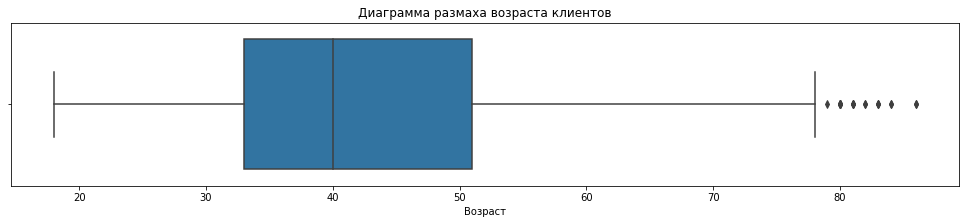

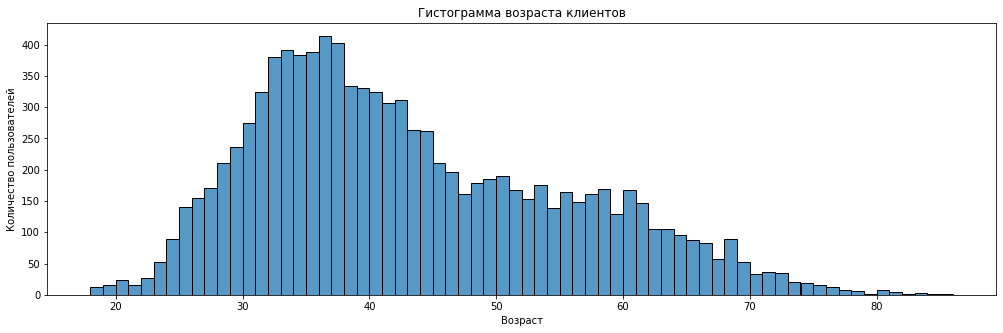

In [41]:
print ('Числовое описание возраста клиентов:')
    
display (df['age'].describe())

plt.figure(figsize=(17,3))
sns.boxplot(df['age'], 
            orient='h').set(title = 'Диаграмма размаха возраста клиентов', 
                            xlabel = 'Возраст', 
                            ylabel = '')
plt.show()

plt.figure(figsize=(17,5))
sns.histplot(df['age'],
             binwidth=1).set(title = 'Гистограмма возраста клиентов', 
                           xlabel = 'Возраст', 
                           ylabel = 'Количество пользователей')
plt.show()

Больше всего клиентов в возрасте 35-50 лет, клиенты старше 75 лет встречаются редко. Минимальный возрат клиента - 18 лет, масиамльный - 86 лет.

#### Рассмотрим распредление кредитного рейтинга клиентов

Числовое описание кредитного рейтинга:


count    9999.000000
mean      848.688069
std        65.441981
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


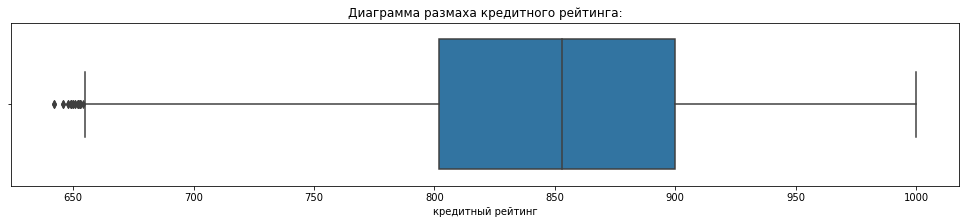

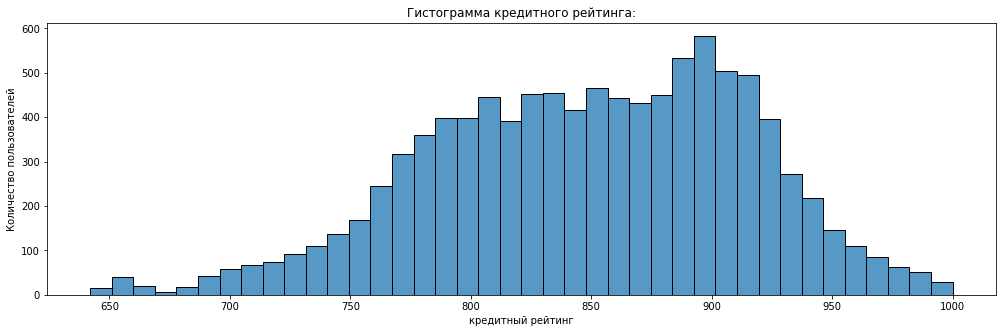

In [42]:
visual_desc_box_hist(df['score'],
       'Числовое описание кредитного рейтинга:',
       'Диаграмма размаха кредитного рейтинга:',
       'Гистограмма кредитного рейтинга:',
       'кредитный рейтинг',
       'Количество пользователей')

У половины клиентов кредитный рейтинг находится в диапазоне 800-900 баллов. Кредитный рейтинг ниже 700 встречается редко. минимальный кредитный рейтинг 642, максимальный - 1000.

#### Рассмотрим распредление баланса клиентов

In [43]:
df['balance'].describe()

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64

По числовому описанию данных видно, что с балансе и доходе ечть выбросы, из-за них представленные выше графики будкт нечитаемы, поэтому применим графики библиотеки plotly.

In [44]:
fig = px.histogram(df, x='balance')

fig.update_layout(title='Гистограмма баланса клиентов',
                   xaxis_title='Баланс',
                   yaxis_title='Количество клиентов')

fig.show()

In [45]:
fig = px.box(df, x="balance")

fig.update_layout(title='Диаграмма распределения баланса клиентов',
                   xaxis_title='Баланс',
                   yaxis_title='')


fig.show()

In [46]:
df.query('balance > 5000000')

user_id  score       city gender   age  equity      balance  products  \
107    134358    985    Рыбинск      Ж  41.0       4   6749773.07         2   
125    227092   1000  Ярославль      М  32.0       5  19757180.85         2   
143    198181    958  Ярославль      М  34.0       3   5763239.76         2   
248    180899    930  Ярославль      М  32.0       4   5527695.02         3   
324    221077    925  Ярославль      Ж  51.0       5   5049319.16         3   
...       ...    ...        ...    ...   ...     ...          ...       ...   
9753   122015    885  Ярославль      М  64.0       4  25727761.86         3   
3230   210135    974  Ярославль      Ж  50.0       5   5680148.93         4   
869    210662    962  Ярославль      Ж  54.0       5   5069231.39         1   
2597   226719    990  Ярославль      М  37.0       4  14648692.14         2   
1247   228075    932  Ярославль      М   NaN       5   7601719.20         2   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
107             1              0   698013.27      0           0   
125             1              1  1024626.50      0           0   
143             1              1   920730.06      1           0   
248             0              1   360963.15      0           0   
324             0              1   224310.01      0           0   
...           ...            ...         ...    ...         ...   
9753            1              0   168746.90      0           0   
3230            1              1   338471.66      0           0   
869             1              1   955144.85      1           0   
2597            0              0   934412.61      1           0   
1247            1              1   408121.16      0           1   

      is_balance_nan  
107                0  
125                0  
143                0  
248                0  
324                0  
...              ...  
9753               0  
3230               0  
869                0  
2597               0  
1247               0  

[73 rows x 14 columns]

У половины клиентов баланс находится в ппромежутке от 295 до 980 тысяч. Баланс больше 5 млн есть только у 73 клиентов.

#### Рассмотрим распредление дохода клиентов

In [47]:
df['est_salary'].describe()

count    9.999000e+03
mean     1.478792e+05
std      1.393901e+05
min      2.546300e+03
25%      7.525212e+04
50%      1.196615e+05
75%      1.745011e+05
max      1.395064e+06
Name: est_salary, dtype: float64

In [48]:
fig = px.histogram(df, x='est_salary')

fig.update_layout(title='Гистограмма дохода клиентов',
                   xaxis_title='Доход',
                   yaxis_title='Количество клиентов')


fig.show()

In [49]:
fig = px.box(df, x="est_salary")

fig.update_layout(title='Диаграмма распределения дохода клиентов',
                   xaxis_title='Доход',
                   yaxis_title='')


fig.show()

In [50]:
df.query('est_salary > 500000')

user_id  score       city gender   age  equity      balance  products  \
30     155730    946  Ярославль      Ж  47.0       0          NaN         2   
44     210313    935  Ярославль      М  41.0       5   3781118.22         2   
107    134358    985    Рыбинск      Ж  41.0       4   6749773.07         2   
124    192966    686    Рыбинск      Ж  33.0       0          NaN         1   
125    227092   1000  Ярославль      М  32.0       5  19757180.85         2   
...       ...    ...        ...    ...   ...     ...          ...       ...   
5020   168998    886  Ярославль      Ж  35.0       4    394780.61         2   
7931   191520    767  Ярославль      М  45.0       0          NaN         1   
869    210662    962  Ярославль      Ж  54.0       5   5069231.39         1   
8449   210898    805  Ярославль      Ж   NaN       0          NaN         1   
2597   226719    990  Ярославль      М  37.0       4  14648692.14         2   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
30              1              1   660015.85      0           0   
44              1              0   761349.20      0           0   
107             1              0   698013.27      0           0   
124             1              1   518488.59      0           0   
125             1              1  1024626.50      0           0   
...           ...            ...         ...    ...         ...   
5020            1              1   510577.10      1           0   
7931            1              1   880005.05      0           0   
869             1              1   955144.85      1           0   
8449            0              1   922080.25      0           1   
2597            0              0   934412.61      1           0   

      is_balance_nan  
30                 1  
44                 0  
107                0  
124                1  
125                0  
...              ...  
5020               0  
7931               1  
869                0  
8449               1  
2597               0  

[267 rows x 14 columns]

Доход половины пользователей находится в промежутке от 75 до 175 тысяч. Доход выше 500 тысяч есть у 267 клиентов.

### Кодирование перменных

In [51]:
df['city_code'] = df['city']
df['gender_code'] = df['gender']

In [52]:
df = pd.get_dummies(df, columns=['city_code', 'gender_code'])
df

user_id  score       city gender   age  equity      balance  products  \
0      183012    850    Рыбинск      Ж  25.0       1     59214.82         2   
1      146556    861    Рыбинск      Ж  37.0       5    850594.33         3   
2      120722    892    Рыбинск      Ж  30.0       0          NaN         1   
3      225363    866  Ярославль      Ж  51.0       5   1524746.26         2   
4      157978    730  Ярославль      М  34.0       5       174.00         1   
...       ...    ...        ...    ...   ...     ...          ...       ...   
6446   222480    776  Ярославль      Ж  38.0       5    823145.83         2   
6412   226550    939  Ярославль      М  34.0       0          NaN         1   
2597   226719    990  Ярославль      М  37.0       4  14648692.14         2   
8497   227795    839  Ярославль      М  34.0       2    326593.14         2   
1247   228075    932  Ярославль      М   NaN       5   7601719.20         2   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
0               0              1    75719.14      1           0   
1               1              0    86621.77      0           0   
2               1              1   107683.34      0           0   
3               0              1   174423.53      1           0   
4               1              0    67353.16      1           0   
...           ...            ...         ...    ...         ...   
6446            1              1    55777.44      0           0   
6412            1              1   145913.73      0           0   
2597            0              0   934412.61      1           0   
8497            1              0   103314.92      0           0   
1247            1              1   408121.16      0           1   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
0                  0                 0                  1   
1                  0                 0                  1   
2                  1                 0                  1   
3                  0                 0                  0   
4                  0                 0                  0   
...              ...               ...                ...   
6446               0                 0                  0   
6412               1                 0                  0   
2597               0                 0                  0   
8497               0                 0                  0   
1247               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М  
0                       0              1              0  
1                       0              1              0  
2                       0              1              0  
3                       1              1              0  
4                       1              0              1  
...                   ...            ...            ...  
6446                    1              1              0  
6412                    1              0              1  
2597                    1              0              1  
8497                    1              0              1  
1247                    1              0              1  

[9999 rows x 19 columns]

Категориальные переменные закодированы

### Вывод по разделу

В таблице 12 столбцов и 10 тысяч строк:

USERID - идентификатор пользователя,

score - баллы кредитного скоринга,

city - город,

gender - пол,

age - возарст,

equity - количество баллов собственности,

balance - баланс на счёте,

products - количество продуктов, которыми пользуется клиент,

credit_card - есть ли кредитная карта,

last_activity - активный клиент,

EST_SALARY - оценочный доход клиента,

churn - признак оттока.

Есть пропуски в столбцах с возрастом (0,26%) и балансом (22,95%).

Явных дубликатов не обнаружено.

Из числового описания таблицы следует, что есть значительные выбросы в данных о балансе, чуть больше половины пользователей активны, седний уровень оттока по банку 18,2%.

Столбцы приведены к нижнему регистру.

Столбцы с баллами кредитного скоринга и возрастом приведены к целочмсленному типу.

Столбец с городами содержит 3 уникальных значения, неявных дубликатов не обнаружено.

Столбец с полом содержит 2 уникальных значения, неявных дубликатов не обнаружено, количество женщин и мужчин в выборке примерно равно.

Столбец с баллами собственности принимает значения от 0 до 9.

Столбец с баллами количеством продуктов принимает значения от 0 до 5.

Стоблбец с признаком наличия кредитной карты принимает значение 1, если кредитная карта есть, и значение 0 если кредитной карты нет.

Столбец с признаком активности клиента принимет значения 0 и 1, 0 если клиент неактивный и 1 если активный.

Столбец с признаком оттока принимет значения 0 и 1, 0 если клиент остается в банке и 1 если клиент ушёл.

Есть 73 дубликата идентификатора пользователя.

Наличие дубликатов не связано с оттоком.

Наличие дубликатов не связано с открытием редитной линии.

Есть 73 задублированных id, на каждый id приходятся два города Ярославль и Рыбинск, возможно из-за техннической ошибки людям из разных городов присваивался одинаковый id. Предположения что дубли связаны с открытием кредитной линии или уходом клиента не подтвердились.

Так как скорее всего под одним id два разных клиента из разнвх городов, присвоим новые id задублированным клиентам из Рыбинска.

Пропуски присутствуют в столбцах с возрастом (0,26%) и с балансом (22,95%). 

Пропусков в возрасте клиентов 26, у этих клиентов в два раза меньше средний балл собственности, в полтора раза выше средний баланс и уровень оттока 3,8%, что очень мало по сравнению с остальными клиентами для которых уровень оттока 18,3%. 

Скорее всего пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это может исказить результаты.

В таблице с пропусками в балансе низкие значения собственности (максимально 3 против 9 в таблице безпропусков), так же при отсутствии баланса уменьшается среднее количество продуктов.

При этом из клиентов с отсутствующим балансом ушедших всего 0,5%, что очень мало по сравнению с теми у кого есть данные о балансе, там ушедших 23%. Так же у клиентов с отсутствующим балансом чаще есть кредитне карты 82% против 64%

Нулевые балансы есть, их всего 2, отрицательных нет.

Больше всего пропуски в балансе связаны с оценкой имущества и во вторую очередь с количеством продуктов, однако это не поможет заполнить пропуски, оставим как есть.

Скорее всего пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Было принято решение не обрабатывать пропуски

Больше всего клиентов в возрасте 35-50 лет, клиенты старше 75 лет встречаются редко. Минимальный возрат клиента - 18 лет, масиамльный - 86 лет.

У половины клиентов кредитный рейтинг находится в диапазоне 800-900 баллов. Кредитный рейтинг ниже 700 встречается редко. минимальный кредитный рейтинг 642, максимальный - 1000.

У половины клиентов баланс находится в ппромежутке от 295 до 980 тысяч. Баланс больше 5 млн есть только у 73 клиентов.

Доход половины пользователей находится в промежутке от 75 до 175 тысяч. Доход выше 500 тысяч есть у 267 клиентов.

Категориальные переменные закодированы.

## Исследовательский анализ данных

### Анализ распределения признаков в разрезе оттока

In [53]:
df['churn'].mean()

0.18191819181918192

#### Распределение клиентов по городам

In [54]:
def vis_bar (df, feature, xlabel, title):
    df_feature = df.pivot_table(index=feature, values='churn', aggfunc=['sum', 'count']).reset_index()
    df_feature['percent'] = round(df_feature['sum']/df_feature['count']*100, 2)
    df_feature.columns=['feature', 'churn', 'all', 'percent']
    df_feature = df_feature.sort_values(by='percent')
    display(df_feature)
    plt.figure(figsize=(17, 7))
    sns.barplot(data = df_feature, x='feature', y='percent')
    plt.title(title, fontsize=18)
    plt.ylabel('Процент ушедших', fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.grid()
    plt.yticks(fontsize=14)
    plt.axhline(y=18.33, color='red', linestyle='--')
    plt.show

In [55]:
def vis_hist (df, feature, xlabel, title):
    plt.figure(figsize=(17, 7))
    sns.histplot(data=df, x=feature, hue='churn', stat="density", common_norm=False, alpha=0.5)
    plt.title(title, fontsize=18)
    plt.ylabel('Доля клиентов', fontsize=16)
    plt.xlabel(xlabel, fontsize=16)
    plt.grid()
    plt.yticks(fontsize=14)
    plt.show()

feature  churn   all  percent
1    Рыбинск    436  2694    16.18
0     Ростов    266  1417    18.77
2  Ярославль   1117  5888    18.97

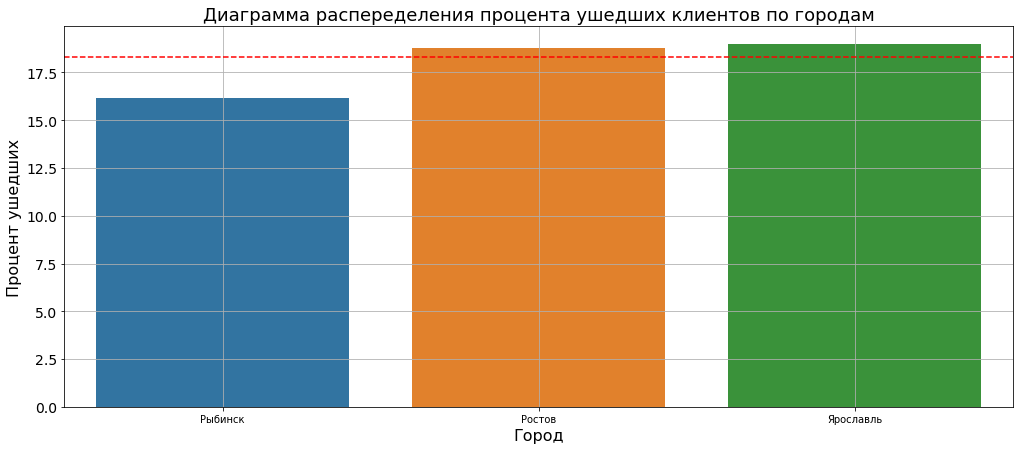

In [56]:
vis_bar(df, 
    'city',
    'Город', 
    'Диаграмма распеределения процента ушедших клиентов по городам')

В Рыбинске уровень оттока ниже среднего

#### Распределение клиентов  по категориям кредитного рейтинга

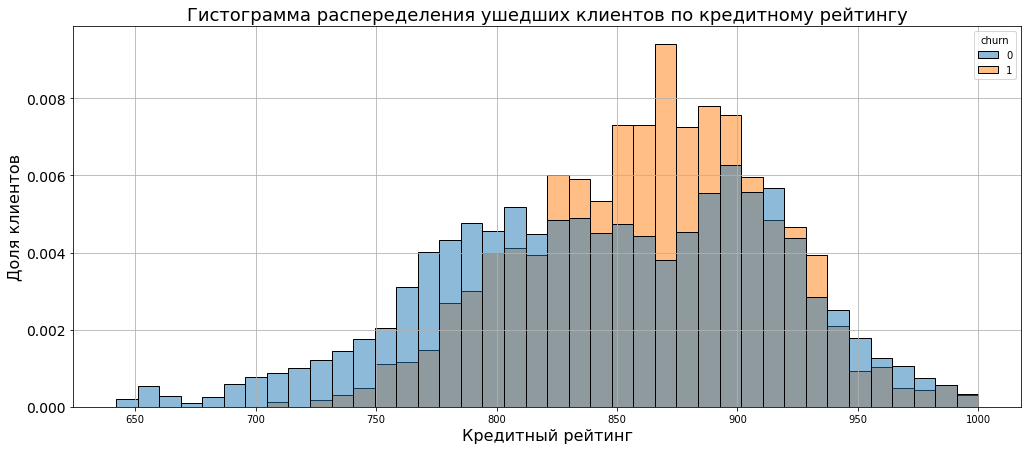

In [57]:
vis_hist(df, 
    'score',
    'Кредитный рейтинг',
    'Гистограмма распеределения ушедших клиентов по кредитному рейтингу')

Клиенты с кредитным рейтингом 830- 910 более склонны к уходу

#### Распределение клиентов по половому признаку

feature  churn   all  percent
0       Ж    636  4994    12.74
1       М   1183  5005    23.64

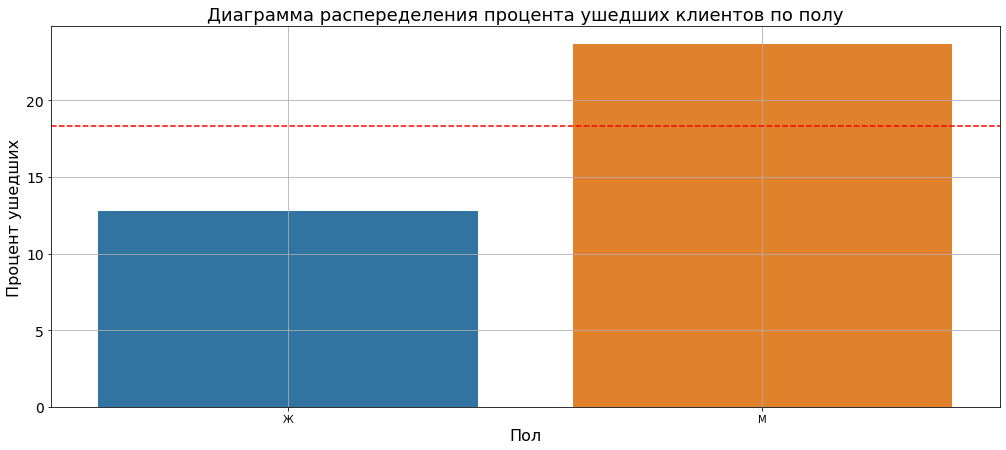

In [58]:
vis_bar(df, 
    'gender', 
    'Пол', 
    'Диаграмма распеределения процента ушедших клиентов по полу')

Мужчины уходят из банка в два раза чаще женщин

#### Распределение клиентов по возрасту

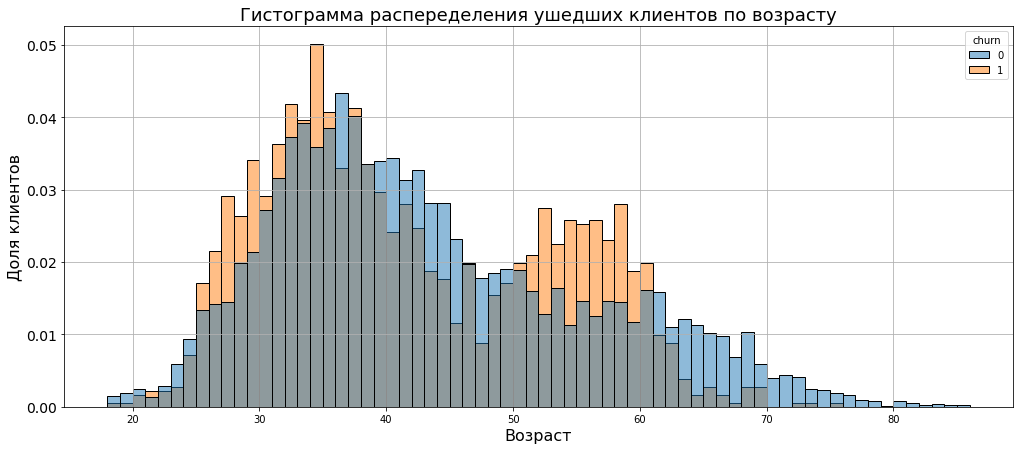

In [59]:
#vis_hist(df, 
#    'age',
#    'Возраст', 
#    'Гистограмма распеределения ушедших клиентов по возрасту')
plt.figure(figsize=(17, 7))
sns.histplot(data=df, x='age', hue='churn', stat="density", common_norm=False, alpha=0.5, binwidth=1)
plt.title('Гистограмма распеределения ушедших клиентов по возрасту', fontsize=18)
plt.ylabel('Доля клиентов', fontsize=16)
plt.xlabel('Возраст', fontsize=16)
plt.grid()
plt.yticks(fontsize=14)
plt.show()

Чаще всего уходят люди в возрасте 25-35 и 50-60 лет

#### Распределение клиентов по баллам собственности

feature  churn   all  percent
0        0     90  2592     3.47
1        1     93   774    12.02
2        2    166  1052    15.78
3        3    321  1542    20.82
4        4    464  1850    25.08
5        5    577  1918    30.08
8        8      6    17    35.29
6        6     58   161    36.02
7        7     37    80    46.25
9        9      7    13    53.85

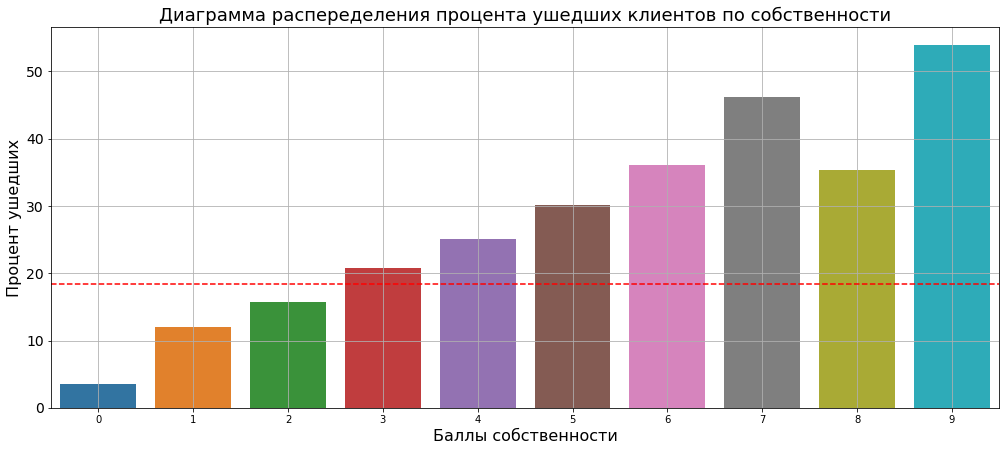

In [60]:
vis_bar(df, 
    'equity',
    'Баллы собственности', 
    'Диаграмма распеределения процента ушедших клиентов по собственности')

Чем выше баллы собственности, тем чаще уходят клиенты (более 3)

#### Распределение клиентов по категории баланса

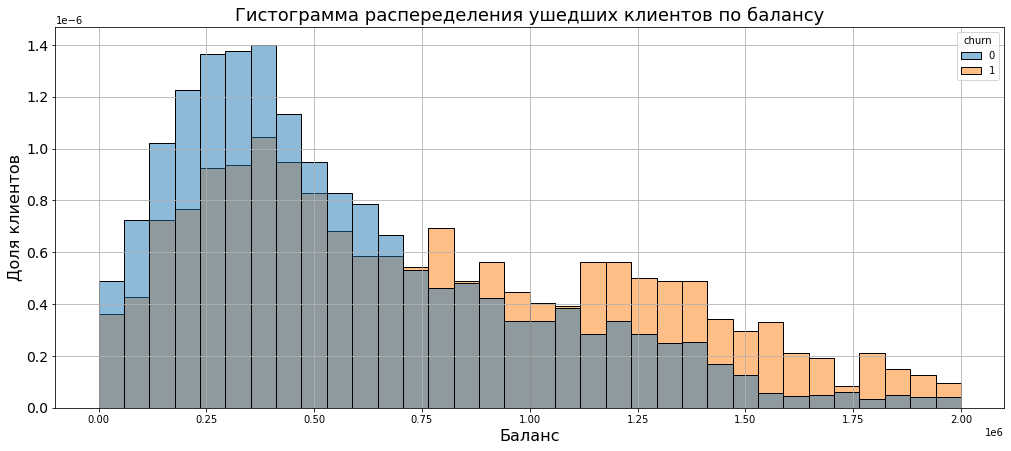

In [61]:
vis_hist(df[df['balance']<2000000],
    'balance',
    'Баланс', 
    'Гистограмма распеределения ушедших клиентов по балансу')

Чем выше баланс, тем чаще уходят клиенты (от 750 тыс)

#### Распределение клиентов по количеству продуктов

feature  churn   all  percent
0        1    235  3341     7.03
1        2    979  5126    19.10
2        3    297  1039    28.59
4        5      8    19    42.11
3        4    300   474    63.29

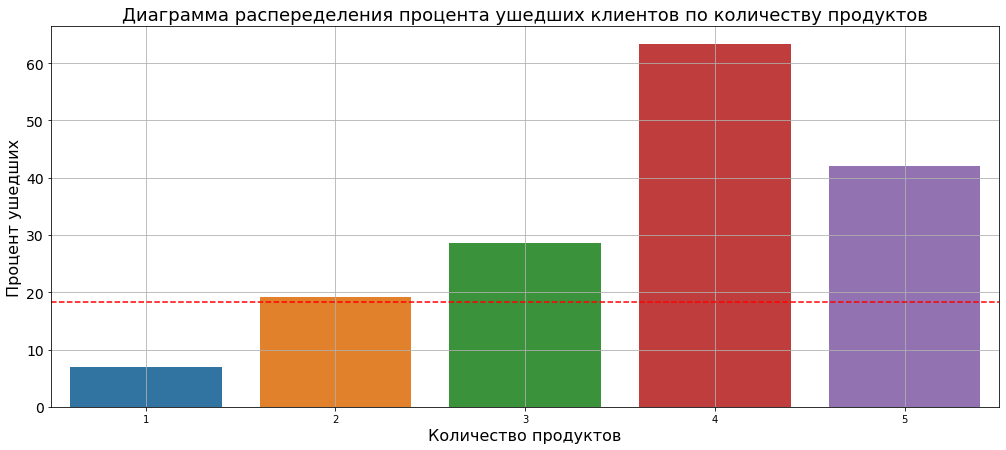

In [62]:
vis_bar(df, 
    'products',
    'Количество продуктов', 
    'Диаграмма распеределения процента ушедших клиентов по количеству продуктов')

#### Распределение клиентов по наличию кредитной карты

feature  churn   all  percent
1        1   1003  6804    14.74
0        0    816  3195    25.54

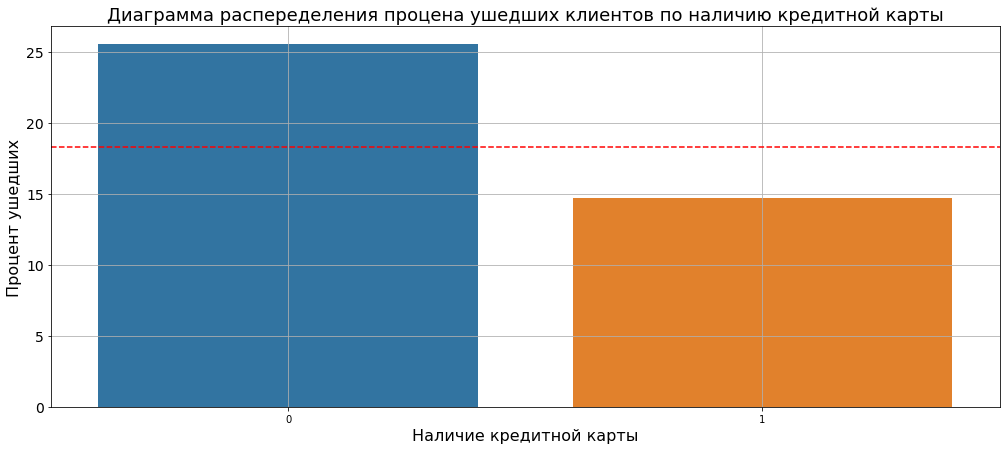

In [63]:
vis_bar(df, 
        'credit_card', 
        'Наличие кредитной карты', 
        'Диаграмма распеределения процена ушедших клиентов по наличию кредитной карты')

Клиенты без кредитной карты уходят чаще

#### Распределение клиентов по признаку активности

feature  churn   all  percent
0        0    541  4764    11.36
1        1   1278  5235    24.41

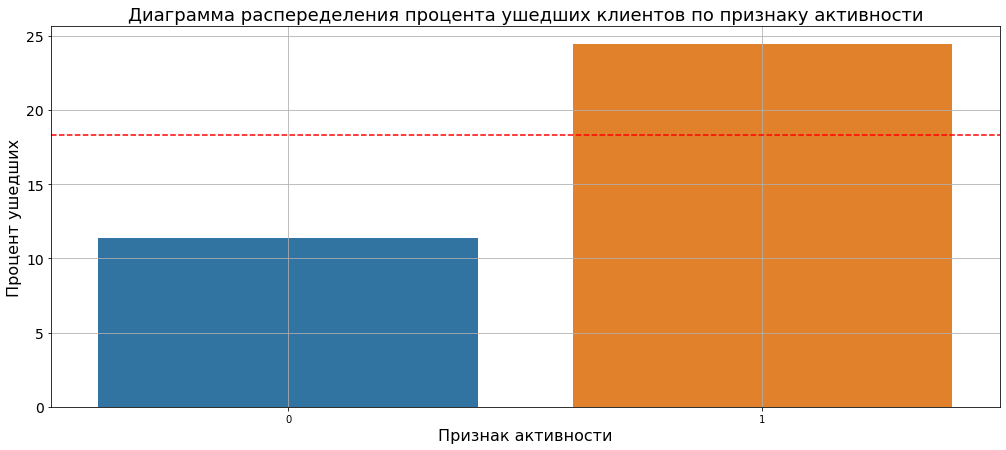

In [64]:
vis_bar(df, 
    'last_activity',
    'Признак активности', 
    'Диаграмма распеределения процента ушедших клиентов по признаку активности')

Чаще уходят активные клиенты

#### Распределение клиентов по категории дохода

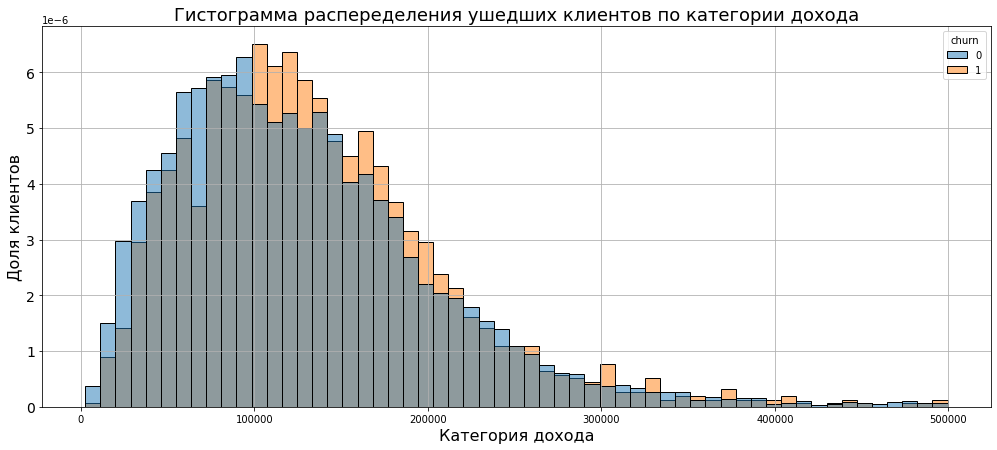

In [65]:
vis_hist(df[df['est_salary']<500000], 
    'est_salary',
    'Категория дохода', 
    'Гистограмма распеределения ушедших клиентов по категории дохода')

Чаще уходят пользователи с доходом от 100 до 220 тыс.

### Анализ портретов клиентов в разрезе оттока

In [66]:
df_churn = df[df['churn']==1]
df_loyal = df[df['churn']==0]

In [67]:
data = {'Признак': ['город','кредитный рейтинг', 'пол', 'возраст', 'балл собственности', 'баланс', 'продукты', 'кредитная карта', 'активность', 'доход'],
        'Отток': ['Ярославль',
                  df_churn['score'].mean().astype('int'), 
                  'М', 
                  df_churn['age'].mean().astype('int'), 
                  df_churn['equity'].median().astype('int'),
                  round(df_churn['balance'].median(), 2),
                  df_churn['products'].median().astype('int'),
                  '1',
                  '1',
                  round(df_churn['est_salary'].median(), 2)],
        'Лояльность':  ['Рыбинск',
                  df_loyal['score'].mean().astype('int'), 
                  'Ж', 
                  df_loyal['age'].mean().astype('int'), 
                  df_loyal['equity'].median().astype('int'),
                  round(df_loyal['balance'].median(),2),
                  df_loyal['products'].median().astype('int'),
                  '1',
                  '0',
                  round(df_loyal['est_salary'].median(),2)],
        'Относительная разница': ['-',
                  round((df_churn['score'].mean().astype('int') - df_loyal['score'].mean().astype('int'))/df_churn['score'].mean().astype('int')*100, 2), 
                  '-', 
                  round((df_churn['age'].mean().astype('int') - df_loyal['age'].mean().astype('int'))/df_churn['age'].mean().astype('int')*100, 2),
                  '-',
                  round((df_churn['balance'].median().astype('int') - df_loyal['balance'].median().astype('int'))/df_churn['balance'].median().astype('int')*100, 2),
                  '-',
                  '-',
                  '-',
                  round((df_churn['est_salary'].median().astype('int') - df_loyal['est_salary'].median().astype('int'))/df_churn['est_salary'].median().astype('int')*100, 2)]
        }
portret = pd.DataFrame(data)
portret

Признак      Отток Лояльность Относительная разница
0               город  Ярославль    Рыбинск                     -
1   кредитный рейтинг        863        845                  2.09
2                 пол          М          Ж                     -
3             возраст         41         43                 -4.88
4  балл собственности          4          3                     -
5              баланс  782410.47  475382.44                 39.24
6            продукты          2          2                     -
7     кредитная карта          1          1                     -
8          активность          1          0                     -
9               доход  125395.22  118257.72                  5.69

Самая большая относительная разница между отточными и лояльными клиентами у признака "баланс". У отточных клиентов медианный баланс на 39,24% больше, чем у лояльных(взят медианный из-за выбросов). Медианный доход отточных клиентов на 5,69% больше чем у лояльных(взят медианный из-за выбросов). 

### Корреляционный анализ

In [68]:
df[['score', 
    'age', 
    'gender', 
    'city', 
    'equity', 
    'balance', 
    'products', 
    'credit_card', 
    'last_activity', 
    'est_salary', 
    'gender_code_Ж',
    'gender_code_М',
    'city_code_Ростов', 
    'city_code_Рыбинск', 
    'city_code_Ярославль', 
    'churn']].corr().style.background_gradient('coolwarm')

По стандартной корреляции Пирсона наибольшая связь с оттоком клиентов прослеживается у таких признаков как количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности и возраста с полом

In [69]:
df_phik = (df[['score', 
    'age', 
    'gender', 
    'city', 
    'equity', 
    'balance', 
    'products', 
    'credit_card', 
    'last_activity', 
    'est_salary', 
    'churn']].phik_matrix(interval_cols = ['score', 'age', 'balance', 'est_salary']))
df_phik.style.background_gradient('coolwarm')

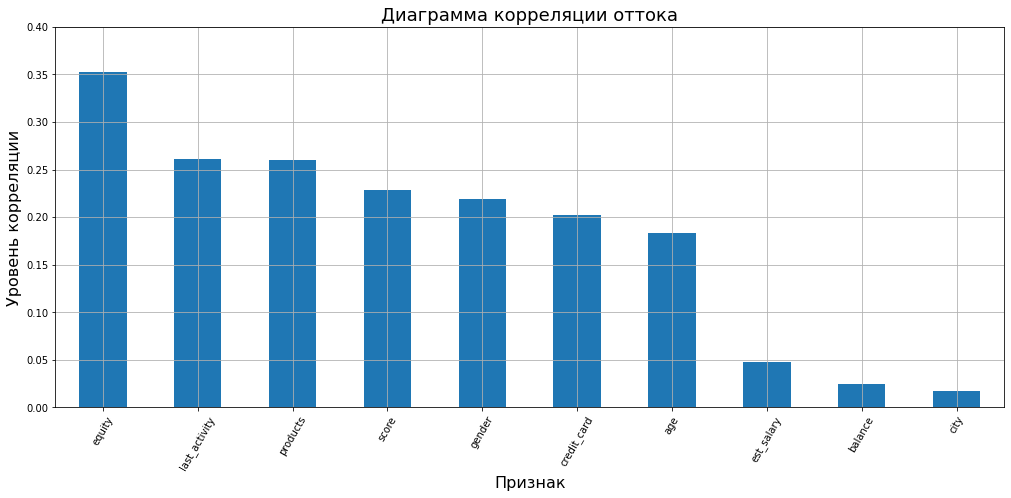

In [70]:
plt.figure(figsize=(17, 7))
df_phik['churn'].sort_values(ascending=False).plot(kind='bar')
plt.xlim(0.5,10.5)
plt.ylim(0,0.4)
plt.title('Диаграмма корреляции оттока', fontsize=18)
plt.ylabel('Уровень корреляции', fontsize=16)
plt.xlabel('Признак', fontsize=16)
plt.xticks(rotation=60)
plt.grid();

При вычислении корреляций при помощи библиотеки phik, наиболее тесно связанными с оттоком оказались так же количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности, наличия кредитной карты с количесвтом продуктов, уровнем дохода и балансом, количеством бвллов собственности крдитным рейтингом.

### Вывод по разделу:

В Рыбинске уровень оттока ниже среднего

Клиенты с кредитным рейтингом 830 - 910 более склонны к уходу

Мужчины уходят из банка в два раза чаще женщин

Чаще всего уходят люди в возрасте 25-35 и 50-60 лет

Чем выше баллы собственности, тем чаще уходят клиенты (более 3)

Чаще уходят клиенты с высоким балансом (более 750 тыс)

Реже всего уходят клиенты с одним продуктом, чаще всего с 4

Клиенты без кредитной карты уходят чаще

Чаще уходят активные клиенты

Чаще уходят пользователи с доходом от 100 до 220 тыс.

Самый высокий процент оттока у клиентов имеющих более 3 продуктов (62,47%), далее клиенты с высоким балансом (34,8%) и клиенты с баллами собственности больше 3 (28,45%)

Самый низкий уровень оттока у клиентов имеющих менее 3 продуктов (7,03%), далее клиенты с баллами собственности менее 3 (7,90%) и неактивные клиенты.

По стандартной корреляции Пирсона наибольшая связь с оттоком клиентов прослеживается у таких признаков как количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности.

При вычислении корреляций при помощи библиотеки phik, наиболее тесно связанными с оттоком оказались так же количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности, наличия кредитной карты с количесвтом продуктов, уровнем дохода и балансом, количеством бвллов собственности крдитным рейтингом.

## Проверка гипотез

### Гипотеза 1. Между оставшимися и ушедшими клиентами есть разница в доходе

Нулевая гипотеза: Средний доход ушедших клиентов равен среднему доходу оставшихся

Альтернативная гипотеза: Средний доход ушедших клиентов не равен среднему доходу оставшихся

В даных о доходе клиентов есть выбросы, для проверки гипотезы необходимо сначала от них избавиться. В разделе 1.7.4 показано, что значения выше 323 тыс являются выбросами.

Данные о доходе для ушедших и оставшихся клиентов независимы друг от друга, выборки достаточно велики, и поэтому в соответствии с ЦПТ на таком распределении можно использовать t-критерий Стьюдента. 

Для проверки гипотезы можно использовать ttest, но поскольку выборки будут разного размера необходимо применить параметр equal_var=False

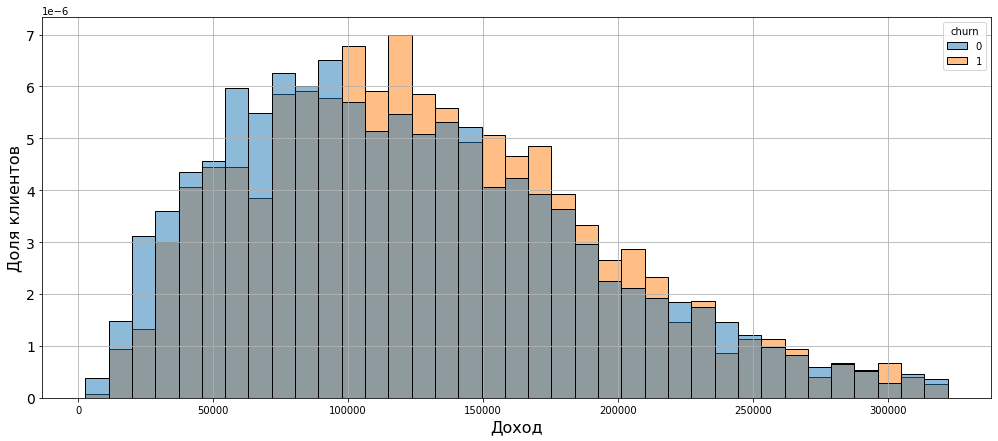

In [71]:
plt.figure(figsize=(17, 7))
sns.histplot(data=df.query('est_salary<=323000'), x='est_salary', hue='churn',stat="density", common_norm=False, alpha=0.5)
plt.title('', fontsize=18)
plt.ylabel('Доля клиентов', fontsize=16)
plt.xlabel('Доход', fontsize=16)
plt.grid()
plt.yticks(fontsize=14)
plt.show()

In [72]:
df_churn_sal = df.query('churn==1 & est_salary<=323000')
df_loyal_sal = df.query('churn==0 & est_salary<=323000')

In [73]:
alpha = 0.05
results = st.ttest_ind(df_churn_sal['est_salary'], df_loyal_sal['est_salary'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.00010185146487829361
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Между ушедшими и оставшимися клиентами есть разница в доходе

### Гипотеза 2. Между оставшимися и ушедшими клиентами есть разница в балансе

Нулевая гипотеза: Средний баланс ушедших клиентов равен среднему балансу оставшихся

Альтернативная гипотеза: Средний баланс ушедших клиентов не равен среднему балансу оставшихся

В даных о балансе клиентов есть выбросы, для проверки гипотезы необходимо сначала от них избавиться. В разделе 1.7.3 показано, что значения выше 2млн являются выбросами, однако чтобы не отбрасывать слишком много пользователей возьмем за границу выбросов 3млн. 

Данные о балансе для ушедших и оставшихся клиентов независимы друг от друга, график распределения скошен влево  и имеет длинный правосторонний хвост, выборки достаточно велики, и поэтому в соответствии с ЦПТ на таком распределении можно использовать t-критерий Стьюдента. 

Для проверки гипотезы можно использовать ttest, но поскольку выборки будут разного размера необходимо применить параметр equal_var=False

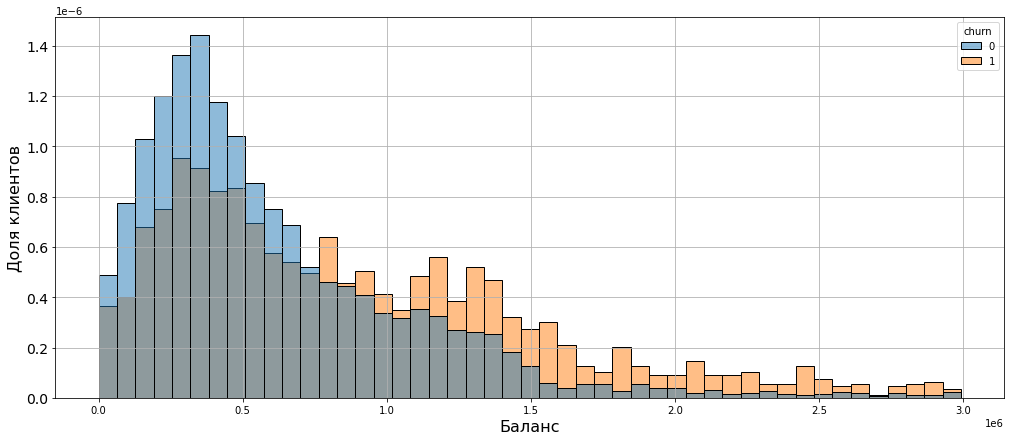

In [74]:
plt.figure(figsize=(17, 7))
sns.histplot(data=df[df['balance']<=3000000], x='balance', hue='churn',stat="density", common_norm=False, alpha=0.5)
plt.title('', fontsize=18)
plt.ylabel('Доля клиентов', fontsize=16)
plt.xlabel('Баланс', fontsize=16)
plt.grid()
plt.yticks(fontsize=14)
plt.show()

In [75]:
df_churn_bal = df_churn.dropna(subset=['balance']).query('balance<=3000000')
df_loyal_bal = df_loyal.dropna(subset=['balance']).query('balance<=3000000')

In [76]:
alpha = 0.05
results = st.ttest_ind(df_churn_bal['balance'], df_loyal_bal['balance'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.2654162338517808e-58
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средний баланс ушедших клиентов не равен среднему балансу оставшихся.

#### Гипотеза 3. Средний баланс ушедших клиентов превышает 750 тыс.

Нулевая гипотеза: Средний баланс ушедших клиентов не превышает 750 тыс.

Альтернативная гипотеза: Средний баланс ушедших клиентов превышает 750 тыс

In [77]:
value = 750000

alpha = 0.05 

results = st.ttest_1samp(
    df_churn_bal['balance'], 
    value,
    alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.1475072458550992e-17
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средний баланс ушедших клиентов превышает 750 тыс

#### Гипотеза 4. Средний баланс оставшихся клиентов не превышает 750 тыс.

Нулевая гипотеза: Средний баланс оставшихся клиентов превышает 750 тыс.

Альтернативная гипотеза: Средний баланс оставшихся клиентов не превышает 750 тыс

In [78]:
value = 750000

alpha = 0.05 

results = st.ttest_1samp(
    df_loyal_bal['balance'], 
    value,
    alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 2.7817017363757088e-114
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средний баланс оставшихся клиентов меньше 750 тыс

### Гипотеза 5. Есть разница в количестве продуктов между ушедшими и оставшимися клиентами

Будем проверять бинапный признак - количество продуктов больше 3 или не больше, будем использовать тест пропорций

Нулевая гипотеза: Доли ушедших клиентов с количеством продуктов меньше 3 и количеством продуктов 3 и более равны

Альтернативная гипотеза: Доли ушедших клиентов с количеством продуктов меньше 3 и количеством продуктов 3 и более не равны

In [79]:
alpha = 0.01
p1 = df.query('churn==1 & products<3')['user_id'].count() / df.query('products<3')['user_id'].count()
p2 = df.query('churn==1 & products>=3')['user_id'].count() / df.query('products>=3')['user_id'].count()
p_combined = (
    df.query('churn==1 & products<3')['user_id'].count() 
    + df.query('churn==1 & products>=3')['user_id'].count()) / (
    df.query('products<3')['user_id'].count() + df.query('products>=3')['user_id'].count())
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/df.query('products<3')['user_id'].count() + 1/df.query('products>=3')['user_id'].count()))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение =', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между исследуемыми группами есть различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу, между исследуемыми группами нет различий")

p-значение = 0.0
Отвергаем нулевую гипотезу: между исследуемыми группами есть различия


Отвергаем нулевую гипотезу. Среднее количество продуктов ушедших и оставшихся пользователей различается

### Гипотеза 6. Есть разница в баллах собственности между ушедшими и оставшимисч клиентами

Будем проверять бинапный признак - количество баллов собственности больше 4 или не больше, будем использовать тест пропорций

Нулевая гипотеза: Доли ушедших клиентов с баллом собственности меньше 4 и баллом собственности 4 и более равны

Альтернативная гипотеза: Доли ушедших клиентов с баллом собственности меньше 4 и баллом собственности 4 и более не равны

In [80]:
alpha = 0.01
p1 = df.query('churn==1 & equity<4')['user_id'].count() / df.query('equity<4')['user_id'].count()
p2 = df.query('churn==1 & equity>=4')['user_id'].count() / df.query('equity>=4')['user_id'].count()
p_combined = (
    df.query('churn==1 & equity<4')['user_id'].count() 
    + df.query('churn==1 & equity>=4')['user_id'].count()) / (
    df.query('equity<4')['user_id'].count() + df.query('equity>=4')['user_id'].count())
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/df.query('equity<4')['user_id'].count() + 1/df.query('equity>=4')['user_id'].count()))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение =', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между исследуемыми группами есть различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу, между исследуемыми группами нет различий")

p-значение = 0.0
Отвергаем нулевую гипотезу: между исследуемыми группами есть различия


Отвергаем нулевую гипотезу. Среднее количество баллов собственности ушедших и оставшихся пользователей различается

### Гипотеза 7. Есть разница в кредитном рейтинге между ушедшими и оставшимися клиентами

Нулевая гипотеза: Среднеи кредитные рейтинги ушедших и оставшихся пользователей равны

Альтернативная гипотеза: Среднеи кредитные рейтинги ушедших и оставшихся пользователей не равны

Данные о кредитном рейтинге для ушедших и оставшихся клиентов независимы друг от друга, выборки достаточно велики, и поэтому в соответствии с ЦПТ на таком распределении можно использовать t-критерий Стьюдента. есть выбросы слева, граница выбросов 655.

Для проверки гипотезы можно использовать ttest, но поскольку выборки будут разного размера необходимо применить параметр equal_var=False

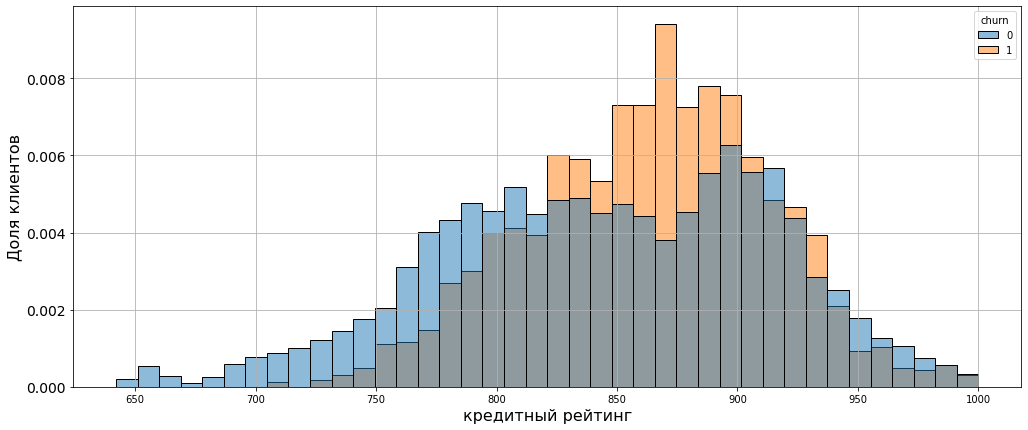

In [81]:
plt.figure(figsize=(17, 7))
sns.histplot(data=df, x='score', hue='churn',stat="density", common_norm=False, alpha=0.5)
plt.title('', fontsize=18)
plt.ylabel('Доля клиентов', fontsize=16)
plt.xlabel('кредитный рейтинг', fontsize=16)
plt.grid()
plt.yticks(fontsize=14)
plt.show()

In [82]:
alpha = 0.05
results = st.ttest_ind(df_churn.query('score>=655')['score'], df_loyal.query('score>=655')['score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1279974502642625e-34
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средние кредитные рейтинги ушедших и оставшихся пользователей различаются

### Гипотеза 8. Доли ушедших мужчин и женщин различаются

Так как признак пола бинарный, будем использовать тест пропорций

Нулевая гипотеза: Отток для женщин и мужчин одинаковый

Альтернативная гипотеза: Отток для женщин и мужчин различается

In [83]:
alpha = 0.01
p1 = df.query('churn==1 & gender=="Ж"')['user_id'].count() / df.query('gender=="Ж"')['user_id'].count()
p2 = df.query('churn==1 & gender=="М"')['user_id'].count() / df.query('gender=="М"')['user_id'].count()
p_combined = (
    df.query('churn==1 & gender=="Ж"')['user_id'].count() 
    + df.query('churn==1 & gender=="М"')['user_id'].count()) / (
    df.query('gender=="Ж"')['user_id'].count() + df.query('gender=="М"')['user_id'].count())
difference = p1 - p2
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * 
                                        (1/df.query('gender=="Ж"')['user_id'].count() + 1/df.query('gender=="М"')['user_id'].count()))
distr = st.norm(0, 1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение =', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между исследуемыми группами есть различия")
else:
    print("Не получилось отвергнуть нулевую гипотезу, между исследуемыми группами нет различий")

p-значение = 0.0
Отвергаем нулевую гипотезу: между исследуемыми группами есть различия


Отвергаем нулевую гипотезу. Доли ушедших мужчин и женщин различаются

### Вывод по разделу:

Между ушедшими и оставшимися клиентами есть разница в доходе

Средний баланс ушедших клиентов не равен среднему балансу оставшихся

Средний баланс ушедших клиентов превышает 750 тыс

Средний баланс оставшихся клиентов меньше 750 тыс

Среднее количество продуктов ушедших и оставшихся пользователей различается

Среднее количество баллов собственности ушедших и оставшихся пользователей различается

Средние кредитные рейтинги ушедших и оставшихся пользователей различаются

Доли ушедших мужчин и женщин различаются

## Подведение промежуточных итогов

In [84]:
data = {'feature': ['score', 'gender', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary'],
        'hig_churn': ['830-910', 'М', '25-35, 50-60', '>3', '>750тыс', '>3', '0', '1', '100тыс-220тыс'],
        'hig_churn_percent': [round(df.query('score>=830 & score<=910')['churn'].mean(),4)*100,
                               round(df.query('gender=="М"')['churn'].mean(),4)*100,
                               round(df.query('(age>=25 & age<=35) | (age>=50 & age<=60)')['churn'].mean(),4)*100,
                               round(df.query('equity>3')['churn'].mean(),4)*100, 
                               round(df.query('balance>=750000')['churn'].mean(),4)*100, 
                               round(df.query('products>=3')['churn'].mean(),4)*100, 
                               round(df.query('credit_card==0')['churn'].mean(),4)*100, 
                               round(df.query('last_activity==1')['churn'].mean(),4)*100, 
                               round(df.query('est_salary>=100000 & est_salary<=220000')['churn'].mean(),4)*100],
        'low_churn': ['<830, >910', 'Ж', '<25, 35-50, >60', '<3', '<300тыс', '1', '1', '0', '<80тыс'],
        'low_churn_percent':  [round(df.query('score<830 | score>910')['churn'].mean(),4)*100,
                               round(df.query('gender=="Ж"')['churn'].mean(),4)*100,
                               round(df.query('age<25 | (age>35 & age<50) | age>60')['churn'].mean(),4)*100,
                               round(df.query('equity<3')['churn'].mean(),4)*100, 
                               round(df.query('balance<250000')['churn'].mean(),4)*100, 
                               round(df.query('products==1')['churn'].mean(),4)*100, 
                               round(df.query('credit_card==1')['churn'].mean(),4)*100, 
                               round(df.query('last_activity==0')['churn'].mean(),4)*100, 
                               round(df.query('est_salary<80000')['churn'].mean(),4)*100],
        }
portret = pd.DataFrame(data)
portret['hig_churn_percent'] = portret['hig_churn_percent'].astype('float')
portret['low-churn-percent'] = portret['low_churn_percent'].astype('float')
portret.sort_values(by='hig_churn_percent', ascending=False)

feature      hig_churn  hig_churn_percent        low_churn  \
5       products             >3              39.49                1   
4        balance        >750тыс              34.80          <300тыс   
3         equity             >3              28.45               <3   
6    credit_card              0              25.54                1   
7  last_activity              1              24.41                0   
0          score        830-910              24.26       <830, >910   
1         gender              М              23.64                Ж   
2            age   25-35, 50-60              23.49  <25, 35-50, >60   
8     est_salary  100тыс-220тыс              20.40           <80тыс   

   low_churn_percent  low-churn-percent  
5               7.03               7.03  
4              15.79              15.79  
3               7.90               7.90  
6              14.74              14.74  
7              11.36              11.36  
0              13.64              13.64  
1              12.74              12.74  
2              13.30              13.30  
8              15.10              15.10

Проверка гипотез показала, что на отток клиентов влияют такие факторы как: баланс, доход,  количество продуктов, пол, количество баллов собственности и кредитные рейтинги. Исходя из результатов анализа портрета пользователей, сильнее всего на отток влияют количество продуктов, баланс, количество баллов собственности, наличие кредитной карты и признак активности. по эти параметром будет проведена сегментация клиентов.

## Сегментация клиентов

In [85]:
def score_cat(score):
    if score < 830:
        return 'low'
    if 830 <= score <= 910:
        return 'middle'
    if 910 < score:
        return 'high'

In [86]:
df['score_cat'] = df['score'].apply(score_cat)

In [87]:
def age_cat(age):
    if age < 25:
        return '18-24'
    if 25 <= age < 34:
        return '25-34'
    if 35 <= age < 50:
        return '35-50'
    if 50 <= age < 60:
        return '50-60'
    if 60 <= age:
        return '60+'

In [88]:
df['age_cat'] = df['age'].apply(age_cat)

In [89]:
def balance_cat(balance):
    if balance < 250000:
        return 'low'
    if 250000 <= balance < 750000:
        return 'middle'
    if 750000 <= balance:
        return 'high'

In [90]:
df['balance_cat'] = df['balance'].apply(balance_cat)

In [91]:
def equity_cat(equity):
    if equity <= 3:
        return 'low'
    if equity > 3:
        return 'high'

In [92]:
df['equity_cat'] = df['equity'].apply(equity_cat)

In [93]:
def products_cat(products):
    if products < 3:
        return 'low'
    if products >= 3:
        return 'high'

In [94]:
df['products_cat'] = df['products'].apply(products_cat)

In [95]:
df['churn'].mean()

0.18191819181918192

### Сегмент 1. Люди предпенсионного возраста с высоким балансом

In [96]:
pre_pensioner= df.query('balance_cat=="high" & age_cat=="50-60"')
pre_pensioner

user_id  score       city gender   age  equity     balance  products  \
3      225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
5      202305    856    Рыбинск      М  56.0       4   863687.24         3   
8      211686    923  Ярославль      М  54.0       5  1206337.87         2   
41     206939    814    Рыбинск      М  56.0       2  1067536.40         2   
56     188364    860  Ярославль      М  55.0       6   865702.41         2   
...       ...    ...        ...    ...   ...     ...         ...       ...   
161   1973640    928    Рыбинск      Ж  53.0       6  1347183.86         2   
4611  2176190    903    Рыбинск      Ж  59.0       5   844055.83         2   
3230   210135    974  Ярославль      Ж  50.0       5  5680148.93         4   
869    210662    962  Ярославль      Ж  54.0       5  5069231.39         1   
1359   211130    833  Ярославль      М  55.0       3  1231184.90         4   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
3               0              1   174423.53      1           0   
5               1              0   156619.80      0           0   
8               1              0   155371.79      0           0   
41              1              0    95563.19      0           0   
56              1              0    76058.00      0           0   
...           ...            ...         ...    ...         ...   
161             0              1   168189.49      1           0   
4611            0              1   133999.76      1           0   
3230            1              1   338471.66      0           0   
869             1              1   955144.85      1           0   
1359            0              1   187758.38      1           0   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
3                  0                 0                  0   
5                  0                 0                  1   
8                  0                 0                  0   
41                 0                 0                  1   
56                 0                 0                  0   
...              ...               ...                ...   
161                0                 0                  1   
4611               0                 0                  1   
3230               0                 0                  0   
869                0                 0                  0   
1359               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М score_cat age_cat  \
3                       1              1              0    middle   50-60   
5                       0              0              1    middle   50-60   
8                       1              0              1      high   50-60   
41                      0              0              1       low   50-60   
56                      1              0              1    middle   50-60   
...                   ...            ...            ...       ...     ...   
161                     0              1              0      high   50-60   
4611                    0              1              0    middle   50-60   
3230                    1              1              0      high   50-60   
869                     1              1              0      high   50-60   
1359                    1              0              1    middle   50-60   

     balance_cat equity_cat products_cat  
3           high       high          low  
5           high       high         high  
8           high       high          low  
41          high        low          low  
56          high       high          low  
...          ...        ...          ...  
161         high       high          low  
4611        high       high          low  
3230        high       high         high  
869         high       high          low  
1359        high        low         high  

[554 rows x 24 columns]

In [97]:
round(pre_pensioner['churn'].mean(),2)

0.46

### Сегмент 2. Молодые активные пользователи со средним кредитным рейтингом

In [98]:
young_active_middle_score = df.query('score_cat=="middle" & age_cat=="25-34" & last_activity==1')
young_active_middle_score

user_id  score       city gender   age  equity     balance  products  \
0      183012    850    Рыбинск      Ж  25.0       1    59214.82         2   
2      120722    892    Рыбинск      Ж  30.0       0         NaN         1   
12     132970    845  Ярославль      Ж  31.0       3   591928.52         2   
13     166357    837    Рыбинск      Ж  28.0       4   302249.22         2   
88     210088    894  Ярославль      М  29.0       3   786911.18         2   
...       ...    ...        ...    ...   ...     ...         ...       ...   
790    170312    901  Ярославль      М  33.0       4  3276783.93         3   
7753   175730    846  Ярославль      Ж  32.0       7   216764.74         4   
4870   197364    889  Ярославль      М  33.0       0         NaN         2   
1513   208081    873  Ярославль      М  31.0       2   232814.75         2   
1970   217643    845  Ярославль      М  29.0       5   733098.45         4   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
0               0              1    75719.14      1           0   
2               1              1   107683.34      0           0   
12              1              1   112697.16      1           0   
13              0              1    30950.94      0           0   
88              1              1    99022.74      1           0   
...           ...            ...         ...    ...         ...   
790             0              1   358700.96      1           0   
7753            1              1    77100.85      1           0   
4870            1              1    96173.48      0           0   
1513            1              1   122505.86      1           0   
1970            1              1    41443.01      1           0   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
0                  0                 0                  1   
2                  1                 0                  1   
12                 0                 0                  0   
13                 0                 0                  1   
88                 0                 0                  0   
...              ...               ...                ...   
790                0                 0                  0   
7753               0                 0                  0   
4870               1                 0                  0   
1513               0                 0                  0   
1970               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М score_cat age_cat  \
0                       0              1              0    middle   25-34   
2                       0              1              0    middle   25-34   
12                      1              1              0    middle   25-34   
13                      0              1              0    middle   25-34   
88                      1              0              1    middle   25-34   
...                   ...            ...            ...       ...     ...   
790                     1              0              1    middle   25-34   
7753                    1              1              0    middle   25-34   
4870                    1              0              1    middle   25-34   
1513                    1              0              1    middle   25-34   
1970                    1              0              1    middle   25-34   

     balance_cat equity_cat products_cat  
0            low        low          low  
2           None        low          low  
12        middle        low          low  
13        middle       high          low  
88          high        low          low  
...          ...        ...          ...  
790         high       high         high  
7753         low       high         high  
4870        None        low          low  
1513         low        low          low  
1970      middle       high         high  

[582 rows x 24 columns]

In [99]:
round(young_active_middle_score['churn'].mean(),2)

0.48

### Сегмент 3. Мужчины с высоким балансом и высоким баллом собственности

In [100]:
rich_men = df.query('gender=="М" & balance_cat=="high" & equity_cat=="high" & last_activity==1')
rich_men

user_id  score       city gender   age  equity     balance  products  \
35     221927    863     Ростов      М  39.0       5  1461423.33         1   
36     199614    822  Ярославль      М  60.0       5  1472483.77         1   
72     156677    873  Ярославль      М  39.0       5   915959.85         3   
77     191976    937  Ярославль      М  33.0       5  2061152.96         2   
79     191348    768  Ярославль      М  36.0       4   963460.20         2   
...       ...    ...        ...    ...   ...     ...         ...       ...   
9667   163657    849  Ярославль      М   NaN       4  1254013.85         2   
790    170312    901  Ярославль      М  33.0       4  3276783.93         3   
2499   199312    948  Ярославль      М  41.0       5  3095721.85         4   
5840   208738    839  Ярославль      М  60.0       5  1102438.37         2   
1247   228075    932  Ярославль      М   NaN       5  7601719.20         2   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
35              0              1   221699.52      0           0   
36              1              1    89132.67      0           0   
72              0              1   154034.62      1           0   
77              1              1   280670.62      1           0   
79              1              1   120197.47      0           0   
...           ...            ...         ...    ...         ...   
9667            1              1   119106.67      0           1   
790             0              1   358700.96      1           0   
2499            1              1   307234.69      1           0   
5840            0              1   116500.81      0           0   
1247            1              1   408121.16      0           1   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
35                 0                 1                  0   
36                 0                 0                  0   
72                 0                 0                  0   
77                 0                 0                  0   
79                 0                 0                  0   
...              ...               ...                ...   
9667               0                 0                  0   
790                0                 0                  0   
2499               0                 0                  0   
5840               0                 0                  0   
1247               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М score_cat age_cat  \
35                      0              0              1    middle   35-50   
36                      1              0              1       low     60+   
72                      1              0              1    middle   35-50   
77                      1              0              1      high   25-34   
79                      1              0              1       low   35-50   
...                   ...            ...            ...       ...     ...   
9667                    1              0              1    middle    None   
790                     1              0              1    middle   25-34   
2499                    1              0              1      high   35-50   
5840                    1              0              1    middle     60+   
1247                    1              0              1      high    None   

     balance_cat equity_cat products_cat  
35          high       high          low  
36          high       high          low  
72          high       high         high  
77          high       high          low  
79          high       high          low  
...          ...        ...          ...  
9667        high       high          low  
790         high       high         high  
2499        high       high         high  
5840        high       high          low  
1247        high       high          low  

[532 rows x 24 columns]

In [101]:
round(rich_men['churn'].mean(),2)

0.61

### Сегмент 4. Люди с высоким балансом и большим количеством продуктов

In [102]:
high_balance_many_products = df.query('balance_cat=="high" & products_cat=="high"')
high_balance_many_products

user_id  score       city gender   age  equity     balance  products  \
1      146556    861    Рыбинск      Ж  37.0       5   850594.33         3   
5      202305    856    Рыбинск      М  56.0       4   863687.24         3   
15     120260    731    Рыбинск      М  42.0       3  1480548.47         3   
72     156677    873  Ярославль      М  39.0       5   915959.85         3   
76     213688    922  Ярославль      Ж  37.0       5  1214707.38         4   
...       ...    ...        ...    ...   ...     ...         ...       ...   
2989   181526    918  Ярославль      Ж  37.0       5  1366382.35         4   
2499   199312    948  Ярославль      М  41.0       5  3095721.85         4   
3230   210135    974  Ярославль      Ж  50.0       5  5680148.93         4   
7453   210627    864  Ярославль      Ж  38.0       4  1527225.32         4   
1359   211130    833  Ярославль      М  55.0       3  1231184.90         4   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
1               1              0    86621.77      0           0   
5               1              0   156619.80      0           0   
15              1              0   160974.43      0           0   
72              0              1   154034.62      1           0   
76              0              1    85121.07      0           0   
...           ...            ...         ...    ...         ...   
2989            1              1    97932.95      1           0   
2499            1              1   307234.69      1           0   
3230            1              1   338471.66      0           0   
7453            1              1   162999.17      1           0   
1359            0              1   187758.38      1           0   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
1                  0                 0                  1   
5                  0                 0                  1   
15                 0                 0                  1   
72                 0                 0                  0   
76                 0                 0                  0   
...              ...               ...                ...   
2989               0                 0                  0   
2499               0                 0                  0   
3230               0                 0                  0   
7453               0                 0                  0   
1359               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М score_cat age_cat  \
1                       0              1              0    middle   35-50   
5                       0              0              1    middle   50-60   
15                      0              0              1       low   35-50   
72                      1              0              1    middle   35-50   
76                      1              1              0      high   35-50   
...                   ...            ...            ...       ...     ...   
2989                    1              1              0      high   35-50   
2499                    1              0              1      high   35-50   
3230                    1              1              0      high   50-60   
7453                    1              1              0    middle   35-50   
1359                    1              0              1    middle   50-60   

     balance_cat equity_cat products_cat  
1           high       high         high  
5           high       high         high  
15          high        low         high  
72          high       high         high  
76          high       high         high  
...          ...        ...          ...  
2989        high       high         high  
2499        high       high         high  
3230        high       high         high  
7453        high       high         high  
1359        high        low         high  

[734 rows x 24 columns]

In [103]:
round(high_balance_many_products['churn'].mean(), 2)

0.52

### Сегмент 5.  Люди с высоким балансом, средним кредитным рейтингом и без кредитной карты

In [104]:
high_balance_middle_score_no_card = df.query('balance_cat=="high" & credit_card==0 & score_cat=="middle"')
high_balance_middle_score_no_card

user_id  score       city gender   age  equity     balance  products  \
3      225363    866  Ярославль      Ж  51.0       5  1524746.26         2   
18     136651    876  Ярославль      М  40.0       5  2307947.36         2   
35     221927    863     Ростов      М  39.0       5  1461423.33         1   
72     156677    873  Ярославль      М  39.0       5   915959.85         3   
85     165331    846     Ростов      Ж  50.0       5  1303130.78         2   
...       ...    ...        ...    ...   ...     ...         ...       ...   
1080   155872    896  Ярославль      М  36.0       3  1113656.92         3   
790    170312    901  Ярославль      М  33.0       4  3276783.93         3   
2226   195884    906  Ярославль      М  49.0       6  1354552.83         2   
5840   208738    839  Ярославль      М  60.0       5  1102438.37         2   
1359   211130    833  Ярославль      М  55.0       3  1231184.90         4   

      credit_card  last_activity  est_salary  churn  is_age_nan  \
3               0              1   174423.53      1           0   
18              0              0   287010.61      0           0   
35              0              1   221699.52      0           0   
72              0              1   154034.62      1           0   
85              0              0   218591.45      0           0   
...           ...            ...         ...    ...         ...   
1080            0              1   291176.85      1           0   
790             0              1   358700.96      1           0   
2226            0              0   270678.42      1           0   
5840            0              1   116500.81      0           0   
1359            0              1   187758.38      1           0   

      is_balance_nan  city_code_Ростов  city_code_Рыбинск  \
3                  0                 0                  0   
18                 0                 0                  0   
35                 0                 1                  0   
72                 0                 0                  0   
85                 0                 1                  0   
...              ...               ...                ...   
1080               0                 0                  0   
790                0                 0                  0   
2226               0                 0                  0   
5840               0                 0                  0   
1359               0                 0                  0   

      city_code_Ярославль  gender_code_Ж  gender_code_М score_cat age_cat  \
3                       1              1              0    middle   50-60   
18                      1              0              1    middle   35-50   
35                      0              0              1    middle   35-50   
72                      1              0              1    middle   35-50   
85                      0              1              0    middle   50-60   
...                   ...            ...            ...       ...     ...   
1080                    1              0              1    middle   35-50   
790                     1              0              1    middle   25-34   
2226                    1              0              1    middle   35-50   
5840                    1              0              1    middle     60+   
1359                    1              0              1    middle   50-60   

     balance_cat equity_cat products_cat  
3           high       high          low  
18          high       high          low  
35          high       high          low  
72          high       high         high  
85          high       high          low  
...          ...        ...          ...  
1080        high        low         high  
790         high       high         high  
2226        high       high          low  
5840        high       high          low  
1359        high        low         high  

[633 rows x 24 columns]

In [105]:
round(high_balance_middle_score_no_card['churn'].mean(), 2)

0.5

### Вывод по разделу:

Было выделено 5 сегментов пользователей с уровнем оттока более 40%:

"Мужчины с высоким балансом и высоким баллом собственности" : баланс от 750тыс, балл собственноти от 4, активные пользователи

"Клиенты с высоким балансом и большим количеством продуктов": баланс от 750тыс, количество продуктов от 3

"Клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты": баланс от 750тыс, кредитный рейтинг 830-910, отсутствие кредитной карты

"Молодые активные клиенты со средним кредитным рейтингом": баланс от 750тыс, возраст 25-34, активные пользователи

"Люди предпенсионного возраста с высоким балансом": баланс от 750тыс, возраст 50-60

## Приоритизация сегментов

In [106]:
data = {'segment': ['Предпенсионеры', 'Молодёжь', 'Состоятельные мужчины', 'Много продуктов', 'Нет кредитной карты'],
        'segment_size': ['554', '579', '530', '730', '632'],
        'churn_percent': ['46', '48', '62', '53', '50'],
        'score_cat': ['any', 'middle', 'any', 'any', 'middle'],
        'gender': ['any', 'any', 'М', 'any', 'any'],
        'age_cat': ['50-60', '25-34', 'any', 'any', 'any'],
        'equity_cat': ['any', 'any', 'high', 'any', 'any'],
        'balance_cat': ['high', 'any', 'high', 'high', 'high'],
        'products_cat': ['any', 'any', 'any', 'high', 'any'],
        'credit_card': ['any', 'any', 'any', 'any', '0'],
        'last_activity': ['any', '1', '1', 'any', 'any']
        }
segments = pd.DataFrame(data)
segments['churn_percent']=segments['churn_percent'].astype('int')
segments=segments.sort_values(by='churn_percent', ascending=False)
segments

segment segment_size  churn_percent score_cat gender age_cat  \
2  Состоятельные мужчины          530             62       any      М     any   
3        Много продуктов          730             53       any    any     any   
4    Нет кредитной карты          632             50    middle    any     any   
1               Молодёжь          579             48    middle    any   25-34   
0         Предпенсионеры          554             46       any    any   50-60   

  equity_cat balance_cat products_cat credit_card last_activity  
2       high        high          any         any             1  
3        any        high         high         any           any  
4        any        high          any           0           any  
1        any         any          any         any             1  
0        any        high          any         any           any

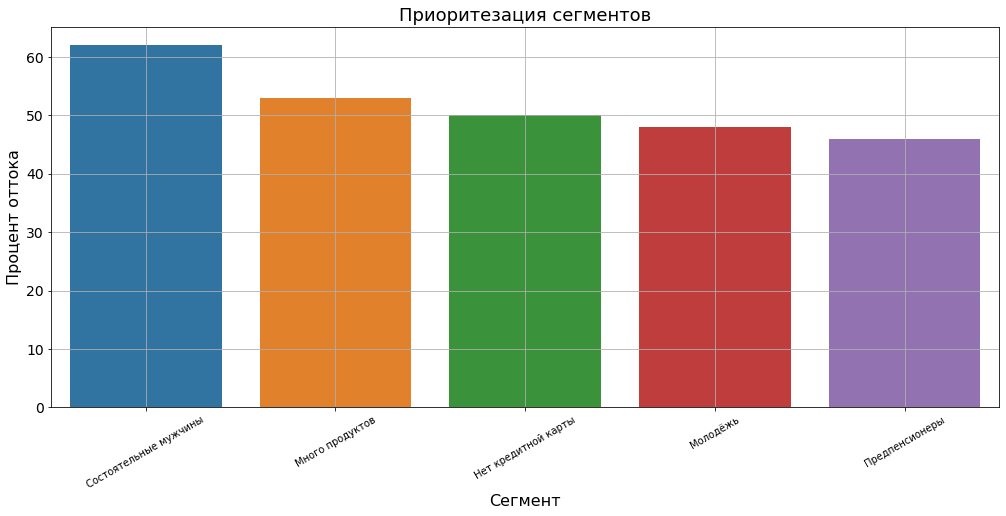

In [107]:
plt.figure(figsize=(17, 7))
sns.barplot(x='segment', y='churn_percent', data=segments.sort_values(by='churn_percent', ascending=False))
plt.title('Приоритезация сегментов', fontsize=18)
plt.ylabel('Процент оттока', fontsize=16)
plt.xlabel('Сегмент', fontsize=16)
plt.grid()
plt.xticks(rotation=30)
plt.yticks(fontsize=14);

Наиболее приоритетными будем считать сегменты с наибольшим уровнем оттока.

Наиболее приоритетный сегмент "мужчины с высоким балансом и высоким баллом собственности" их уровень оттока самый большой - 62%, к тому же эти клиенты могут принести банку хорошую прибыль. Высоким балансом счтается баланс от 750 тыс., высокий балл собственности - 4 и выше.

На втором месте по приоритетности сегмент "клиенты с высоким балансом и большим количеством продуктов", такие клиенты уходят в 53% случаев, к тому же этот сегмент самый обширный. Большое количество продуктов - 3 и выше

На третьем месте сегмент "клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты", клиенты из этого сегмента уходят половине случаев. Средний кредитный рейтинг в диапазоне 830-910(включитльно)

На четвёртом месте сегмент "молодые активные клиенты со средним кредитным рейтингом", они уходят в 48% случаев, к тому же поскольку эти пользователи молодые, они смогут приносить прибыль банку на протяжении долгого времени. Молодыми считаюся клиенты в возрасте 25-34 лет(включительно)

На пятом месте сегмент "люди предпенсионного возраста с высоким балансом", процент оттока в этом сегменте составляет 46%. Предпенсионный возраст - 50-59 лет (включительно)

В 4 из 5 сегметах фигурирует высокий баланс, во-первых это связано с большим влиянием этого признака на отток клиентов, во-вторых клиенты с высоким балансом могут принести банку бльше прибыли.

Возможно клиенты с высоким балансом уходят из-за невыгодных условий по вкладам, отсутствия или низкого значения процентов на остаток, низкого уровня сервиса.

Клиенты старше 50 лет могут уходить из банка из-за сложностей с обслуживанием, например если у банка нет отделений и все вопросы приходится решать через приложение или по телефону.

Клиенты со средним кредитным рейтингом могут уходить из банка, потому что не могут получить в нем кредит из-зп высоких требований банка к кредитному рейтингу.

Клиенты с высоким баллом собственности могут уходить из банка из-за отсутствия услуг по страхованию имущества, или невыгодным условиям по нему.

Процент оттока у активных клиентов выше чем у неактивных может наблюдаться из-за того, что неактивные пользователи редко пользуются продуктами банка (например у них есть картв банка, которой они не пользуются или накопительный счет без пополнения и снятия).

## Формирование рекомендаций для отдела маркетинга для минимизации оттока клиентов

Для сегмента "мужчины с высоким балансом и высоким баллом собственности" можно предложить услуги по страхованию собственности на лучших условиях.

Для сегмента "клиенты с высоким балансом и большим количеством продуктов" можно ввести приоритетное обслуживание, назначить личных менеджеров, это поможет повысить качество обслуживания

Для сегмнета "клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты" можно предложить более выгодные условия по кредитам и кредитным картам. Если банк часто отказывает клиентам со средним уровнем кредитного рейтинга в кредитах, возможно стоит пересмотреть политику в отношении таких клиентов.

Для сегмента "молодые активные клиенты со средним кредитным рейтингом" можно предложить выгодные автокредиты, кредиты на образвание и условия по ипотеке, кешбек на популярные у молодежи категории товаров и услуг, ввести новые сервисы (например по подбору отелеей для отдыха, доставки продуктов, обучения, мобильной связи и тд.)

Для сегмента "люди предпенсионного возраста с высоким балансом" можно предложить пенсионные счета, устранить сложности в пользовании приложением.

## Общий вывод

В таблице 12 столбцов и 10 тысяч строк:

USERID - идентификатор пользователя,

score - баллы кредитного скоринга,

city - город,

gender - пол,

age - возарст,

equity - количество баллов собственности,

balance - баланс на счёте,

products - количество продуктов, которыми пользуется клиент,

credit_card - есть ли кредитная карта,

last_activity - активный клиент,

EST_SALARY - оценочный доход клиента,

churn - признак оттока.

Есть пропуски в столбцах с возрастом (0,26%) и балансом (22,95%).

Явных дубликатов не обнаружено.

Из числового описания таблицы следует, что есть значительные выбросы в данных о балансе, чуть больше половины пользователей активны, седний уровень оттока по банку 18,2%.

Столбцы приведены к нижнему регистру.

Столбцы с баллами кредитного скоринга и возрастом приведены к целочмсленному типу.

Столбец с городами содержит 3 уникальных значения, неявных дубликатов не обнаружено.

Столбец с полом содержит 2 уникальных значения, неявных дубликатов не обнаружено, количество женщин и мужчин в выборке примерно равно.

Столбец с баллами собственности принимает значения от 0 до 9.

Столбец с баллами количеством продуктов принимает значения от 0 до 5.

Стоблбец с признаком наличия кредитной карты принимает значение 1, если кредитная карта есть, и значение 0 если кредитной карты нет.

Столбец с признаком активности клиента принимет значения 0 и 1, 0 если клиент неактивный и 1 если активный.

Столбец с признаком оттока принимет значения 0 и 1, 0 если клиент остается в банке и 1 если клиент ушёл.

Есть 73 дубликата идентификатора пользователя.

Наличие дубликатов не связано с оттоком.

Наличие дубликатов не связано с открытием редитной линии.

Есть 73 задублированных id, на каждый id приходятся два города Ярославль и Рыбинск, возможно из-за техннической ошибки людям из разных городов присваивался одинаковый id. Предположения что дубли связаны с открытием кредитной линии или уходом клиента не подтвердились.

Так как скорее всего под одним id два разных клиента из разнвх городов, присвоим новые id задублированным клиентам из Рыбинска.

Пропуски присутствуют в столбцах с возрастом (0,26%) и с балансом (22,95%). 

Пропусков в возрасте клиентов 26, у этих клиентов в два раза меньше средний балл собственности, в полтора раза выше средний баланс и уровень оттока 3,8%, что очень мало по сравнению с остальными клиентами для которых уровень оттока 18,3%. 

Скорее всего пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это может исказить результаты.

В таблице с пропусками в балансе низкие значения собственности (максимально 3 против 9 в таблице безпропусков), так же при отсутствии баланса уменьшается среднее количество продуктов.

При этом из клиентов с отсутствующим балансом ушедших всего 0,5%, что очень мало по сравнению с теми у кого есть данные о балансе, там ушедших 23%. Так же у клиентов с отсутствующим балансом чаще есть кредитне карты 82% против 64%

Нулевые балансы есть, их всего 2, отрицательных нет.

Больше всего пропуски в балансе связаны с оценкой имущества и во вторую очередь с количеством продуктов, однако это не поможет заполнить пропуски, оставим как есть.

Скорее всего пропуски относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Было принято решение не обрабатывать пропуски

Больше всего клиентов в возрасте 35-50 лет, клиенты старше 75 лет встречаются редко. Минимальный возрат клиента - 18 лет, масиамльный - 86 лет.

У половины клиентов кредитный рейтинг находится в диапазоне 800-900 баллов. Кредитный рейтинг ниже 700 встречается редко. минимальный кредитный рейтинг 642, максимальный - 1000.

У половины клиентов баланс находится в ппромежутке от 295 до 980 тысяч. Баланс больше 5 млн есть только у 73 клиентов.

Доход половины пользователей находится в промежутке от 75 до 175 тысяч. Доход выше 500 тысяч есть у 267 клиентов.

Категориальные переменные закодированы.

В Рыбинске уровень оттока ниже среднего

Клиенты с кредитным рейтингом 830 - 910 более склонны к уходу

Мужчины уходят из банка в два раза чаще женщин

Чаще всего уходят люди в возрасте 25-35 и 50-60 лет

Чем выше баллы собственности, тем чаще уходят клиенты (более 3)

Чаще уходят клиенты с высоким балансом (более 750 тыс)

Реже всего уходят клиенты с одним продуктом, чаще всего с 4

Клиенты без кредитной карты уходят чаще

Чаще уходят активные клиенты

Чаще уходят пользователи с доходом от 100 до 220 тыс.

Самый высокий процент оттока у клиентов имеющих более 3 продуктов (62,47%), далее клиенты с высоким балансом (34,8%) и клиенты с баллами собственности больше 3 (28,45%)

Самый низкий уровень оттока у клиентов имеющих менее 3 продуктов (7,03%), далее клиенты с баллами собственности менее 3 (7,90%) и неактивные клиенты.

По стандартной корреляции Пирсона наибольшая связь с оттоком клиентов прослеживается у таких признаков как количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности.

При вычислении корреляций при помощи библиотеки phik, наиболее тесно связанными с оттоком оказались так же количество продуктов и количество баллов собственности.

Так же прослеживается взаимосвязь количества продуктов с количеством баллов собственности, наличия кредитной карты с количесвтом продуктов, уровнем дохода и балансом, количеством бвллов собственности крдитным рейтингом.

Между ушедшими и оставшимися клиентами есть разница в доходе

Средний баланс ушедших клиентов не равен среднему балансу оставшихся

Средний баланс ушедших клиентов превышает 750 тыс

Средний баланс оставшихся клиентов меньше 750 тыс

Среднее количество продуктов ушедших и оставшихся пользователей различается

Среднее количество баллов собственности ушедших и оставшихся пользователей различается

Средние кредитные рейтинги ушедших и оставшихся пользователей различаются

Доли ушедших мужчин и женщин различаются

Проверка гипотез показала, что на отток клиентов влияют такие факторы как: баланс, доход,  количество продуктов, пол, количество баллов собственности и кредитные рейтинги. Исходя из результатов анализа портрета пользователей, сильнее всего на отток влияют количество продуктов, баланс, количество баллов собственности, наличие кредитной карты и признак активности. по эти параметром будет проведена сегментация клиентов.

Было выделено 5 сегментов пользователей с уровнем оттока более 40%:

"Мужчины с высоким балансом и высоким баллом собственности" : баланс от 750тыс, балл собственноти от 4, активные пользователи

"Клиенты с высоким балансом и большим количеством продуктов": баланс от 750тыс, количество продуктов от 3

"Клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты": баланс от 750тыс, кредитный рейтинг 830-910, отсутствие кредитной карты

"Молодые активные клиенты со средним кредитным рейтингом": баланс от 750тыс, возраст 25-34, активные пользователи

"Люди предпенсионного возраста с высоким балансом": баланс от 750тыс, возраст 50-60

Наиболее приоритетный сегмент "мужчины с высоким балансом и высоким баллом собственности" их уровень оттока самый большой - 62%, к тому же эти клиенты могут принести банку хорошую прибыль. Высоким балансом счтается баланс от 750 тыс., высокий балл собственности - 4 и выше.

На втором месте по приоритетности сегмент "клиенты с высоким балансом и большим количеством продуктов", такие клиенты уходят в 53% случаев, к тому же этот сегмент самый обширный. Большое количество продуктов - 3 и выше

На третьем месте сегмент "клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты", клиенты из этого сегмента уходят половине случаев. Средний кредитный рейтинг в диапазоне 830-910(включитльно)

На четвёртом месте сегмент "молодые активные клиенты со средним кредитным рейтингом", они уходят в 48% случаев, к тому же поскольку эти пользователи молодые, они смогут приносить прибыль банку на протяжении долгого времени. Молодыми считаюся клиенты в возрасте 25-34 лет(включительно)

На пятом месте сегмент "люди предпенсионного возраста с высоким балансом", процент оттока в этом сегменте составляет 46%. Предпенсионный возраст - 50-59 лет (включительно)

В 4 из 5 сегметах фигурирует высокий баланс, во-первых это связано с большим влиянием этого признака на отток клиентов, во-вторых клиенты с высоким балансом могут принести банку бльше прибыли.

Возможно клиенты с высоким балансом уходят из-за невыгодных условий по вкладам, отсутствия или низкого значения процентов на остаток, низкого уровня сервиса.

Клиенты старше 50 лет могут уходить из банка из-за сложностей с обслуживанием, например если у банка нет отделений и все вопросы приходится решать через приложение или по телефону.

Клиенты со средним кредитным рейтингом могут уходить из банка, потому что не могут получить в нем кредит из-зп высоких требований банка к кредитному рейтингу.

Клиенты с высоким баллом собственности могут уходить из банка из-за отсутствия услуг по страхованию имущества, или невыгодным условиям по нему.неактивные

Процент оттока у активных клиентов выше чем у неактивных может наблюдаться из-за того, что неактивные пользователи редко пользуются продуктами банка (например у них есть картв банка, которой они не пользуются или накопительный счет без пополнения и снятия).

Для сегмента "мужчины с высоким балансом и высоким баллом собственности" можно предложить услуги по страхованию собственности на лучших условиях.

Для сегмента "клиенты с высоким балансом и большим количеством продуктов" можно ввести приоритетное обслуживание, назначить личных менеджеров, это поможет повысить качество обслуживания

Для сегмнета "клиенты с высоким балансом, средним кредитным рейтингом и без кредитной карты" можно предложить более выгодные условия по кредитам и кредитным картам. Если банк часто отказывает клиентам со средним уровнем кредитного рейтинга в кредитах, возможно стоит пересмотреть политику в отношении таких клиентов.

Для сегмента "молодые активные клиенты со средним кредитным рейтингом" можно предложить выгодные автокредиты, кредиты на образвание и условия по ипотеке, кешбек на популярные у молодежи категории товаров и услуг, ввести новые сервисы (например по подбору отелеей для отдыха, доставки продуктов, обучения, мобильной связи и тд.)

Для сегмента "люди предпенсионного возраста с высоким балансом" можно предложить пенсионные счета, устранить сложности в пользовании приложением.